# __Option Génomique Bioinformatique :__

## __Session 5 "Axe 2 : Correlograms and Regulation by transcription factors"__
Claire Vandiedonck & Sandrine Caburet
*** 

<span style="color:red">Open this notebook in a folder "GB_5".</span>

**Tutorial / Practical**

In this tutorial/parctical, we will go on in our analysis of transcriptomic data from T1D patients and their related unaffected controls ("Fil Rouge" UE5 and Practical Sessions in UE1).

We will :  
- compute and plot a **correlogram** of DE genes to visualise how their expression is linked  
- focus on one of our genes of interest, ***STAT1***, as it is one of the DE gene and a possible regulator of other DE genes  
- retrieve and process **ChIPseq** data for *STAT1*, to explore the connection between being a DE gene and being a STAT1 target  
- explore together the possible venues of biological questions that stem from the analysis  

To run this analysis, we will use different packages among which:
- the **tidyverse** set of packages that you have seen in session 4, in particular the **ggplot2** package for plots and graphs. 
- **GenomicRanges** package to compare genomic intervals

<div class="alert alert-warning" role="alert"> In this notebook, you will find <b>3 types of code cells:</b>
<ul>
<li>cells with code already available and no question:</span> execute the cells and try to uderstand the command and output</li>
<li><span style="color:green">cells with code already avalaible but for which you have to explain the code in details</span></li>
<li><span style="color:blue">cells without code: you have to find the correct code</span></li>
<br></ul>
In addition, some questions will be asked in orange boxes related to <b>results interpretation</b>.
</div>


---  
---   

## 0. Start: set up parameters, libraries and upload data
---
*(estimated duration: 15 minutes)*

We do the same as in session 1.

### 0.A. Paths and libraries
---

We start with setting up paths to directories.

In [1]:
# Code cell n°1

setwd("~/meg_m1_geno_bioinfo/GB_5")
getwd()
myworking_path <- "./" # modify as necessary
datapath <- "/srv/data/meg-m1-gb/DGE_results/"

# if necessary, a local directory is created for the local installation of packages, and added to .libPaths

if (length(.libPaths() == 1)) {
    dir.create("~/R/x86_64-conda-linux-gnu-library/4.1")
    .libPaths(c("/srv/conda/envs/notebook/lib/R/library", "~/R/x86_64-conda-linux-gnu-library/4.1"))
    }


[1] "/srv/home/cvandiedonck/meg_m1_geno_bioinfo/GB_5"

Warning message in dir.create("~/R/x86_64-conda-linux-gnu-library/4.1"):
“'/srv/home/cvandiedonck/R/x86_64-conda-linux-gnu-library/4.1' already exists”


We install the required libraries, using a conditionnal execution, in order to avoid downloading packages that are already installed in the environment.

<mark> The rtracklayer is not installed in this environment on adenine. It will thus be installed the first time you are running this notebook. It may take a few minutes, be patient. </mark>

In [2]:
# Code cell n°2

# list the required libraries
requiredLib <- c("tidyverse",
                 "statmod",
                 "dendextend",
                 "stats",
                 "grDevices",
                 "ggnewscale",
                 "BiocManager",
                 "RColorBrewer",
                 "writexl",
                 "readxl",
                 "corrplot",
                 "GGally",
                 "ggcorrplot",
                 "ppcor",
                 "ggpubr",
                 "ggrepel")
requiredBiocLib <- c("limma",
                     "gplots",
                     "org.Hs.eg.db",
                     "clusterProfiler",
                     "enrichplot",
                     "ComplexHeatmap",
                     "GeneBreak",
                     "biomaRt",
                     "GenomicRanges",
                     "XVector",
                     "rtracklayer")

# install required libraries if not
for (lib in requiredLib) {
  if (!require(lib, character.only = TRUE, quiet = TRUE)) {
    install.packages(lib, quiet = TRUE, lib = "~/R/x86_64-conda-linux-gnu-library/4.1")
  }
}

for( lib in requiredBiocLib) {
  if (!require(lib, character.only = TRUE, quiet = TRUE)) {
  BiocManager::install(lib, quiet = TRUE, update = FALSE, lib = "~/R/x86_64-conda-linux-gnu-library/4.1")
  }
}


Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendexte

We verify the packages that are installed and available for loading.

In [3]:
# Code cell n°3

installed.packages()[,c(1,2,3)]

,Package,LibPath,Version
abind,abind,/srv/conda/envs/notebook/lib/R/library,1.4-5
AnnotationDbi,AnnotationDbi,/srv/conda/envs/notebook/lib/R/library,1.56.2
ape,ape,/srv/conda/envs/notebook/lib/R/library,5.6-2
aplot,aplot,/srv/conda/envs/notebook/lib/R/library,0.1.8
askpass,askpass,/srv/conda/envs/notebook/lib/R/library,1.1
assertthat,assertthat,/srv/conda/envs/notebook/lib/R/library,0.2.1
backports,backports,/srv/conda/envs/notebook/lib/R/library,1.4.1
base,base,/srv/conda/envs/notebook/lib/R/library,4.1.3
base64enc,base64enc,/srv/conda/envs/notebook/lib/R/library,0.1-3
BH,BH,/srv/conda/envs/notebook/lib/R/library,1.78.0-0


And we load all the librairies in the current session:

In [4]:
# Code cell n°4

# load libraries
message("Loading required libraries")
for (lib in requiredLib) {
  library(lib, character.only = TRUE)}

for (lib in requiredBiocLib) {
  library(lib, character.only = TRUE)}

library(rtracklayer)

Loading required libraries



Finally, we check that all the required librairies were correctly loaded in the current session, and we remove the temporary objects created in this section.

In [5]:
# Code cell n°5

# keep tracks of R and packages for this 
sessionInfo()

rm(lib, requiredLib, requiredBiocLib)

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] rtracklayer_1.54.0    XVector_0.34.0        biomaRt_2.50.3       
 [4] GeneBreak_1.24.0      GenomicRanges_1.46.1  GenomeInfoDb_1.30.1  
 [7] CGHcall_2.56.0        snowfall_1.84-6.2     snow_0.4-4           
[10] CGHbase_1.54.0        marray_1.72.0         DNAcopy_1.68.0       
[13] im


### 0.B. Load Data
---

At the end of the Fil Rouge, we ended up with several R objects that we will reload in this R Session.

We upload them again for this session as we did during session 1.

#### 1. Metadata

- probes

In [6]:
# Code cell n°6

load(paste(datapath, "probes.RData",sep = ""))
ls()
str(probes)
gene_list <- probes$TargetID
cat("There are ", length(unique(gene_list)), "unique genes\n")

[1] "datapath"       "myworking_path" "probes"

'data.frame':	47323 obs. of  9 variables:
 $ ProbeID              : int  6450255 2570615 6370619 2600039 2650615 5340672 2000519 3870044 7050209 1580181 ...
 $ CHROMOSOME           : chr  "7" "19" "19" "10" ...
 $ CYTOBAND             : chr  "7p15.3e" "19q13.43c" "19q13.43c" "10q11.23c" ...
 $ PROBE_CHR_ORIENTATION: chr  "-" "-" "-" "-" ...
 $ PROBE_COORDINATES    : chr  "20147187-20147236" "63548541-63548590" "63549180-63549229" "52566586-52566635" ...
 $ REFSEQ_ID            : chr  "NM_182762.2" "NM_130786.2" "NM_130786.2" "NM_138932.1" ...
 $ ENTREZ_GENE_ID       : int  346389 1 1 29974 29974 29974 23784 23784 23784 54715 ...
 $ TargetID             : chr  "7A5" "A1BG" "A1BG" "A1CF" ...
 $ SYMBOL               : chr  "7A5" "A1BG" "A1BG" "A1CF" ...
There are  34694 unique genes


- samples information (ID, pedigree ID, sex, age, status, stimulation level...)

In [7]:
# Code cell n°7

load(paste(datapath,"samples_info.RData", sep = ""))
ls()
str(samples_info)

[1] "datapath"       "gene_list"      "myworking_path" "probes"        
[5] "samples_info"

'data.frame':	264 obs. of  8 variables:
 $ array.labels: chr  "5753669129_B" "5753669129_C" "5753669129_E" "5753669129_K" ...
 $ PedID       : chr  "1" "1" "1" "1" ...
 $ ID          : chr  "1" "1" "1" "1" ...
 $ Status      : chr  "2" "2" "2" "2" ...
 $ Stim        : chr  "0" "0" "6" "6" ...
 $ Full        : chr  "1_1_2_0" "1_1_2_0" "1_1_2_6" "1_1_2_6" ...
 $ Sex         : chr  "1" "1" "1" "1" ...
 $ Age         : int  10 10 10 10 10 10 18 18 18 18 ...


#### 2. Normalized expression data

We load the `norm.quant` object obtained after log2 transformation and between-samples quantile normalization.

Each row corresponds to an Illumina probeID, while each column name corresponds to an Illumina array sample.
The correspondance between probeID and gene names is provided in the `probes` object, while the experimental design matrix of samples is provided in the ̀`sample_info` object

In [8]:
# Code cell n°8

load(paste(datapath,"norm.quant.RData", sep = ""))
ls()
str(norm.quant)
norm.quant[1:10,1:10]

[1] "datapath"       "gene_list"      "myworking_path" "norm.quant"    
[5] "probes"         "samples_info"

 num [1:47323, 1:264] 7.35 7.09 6.3 6.57 6.49 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:47323] "6450255" "2570615" "6370619" "2600039" ...
  ..$ : chr [1:264] "5753669129_B" "5753669129_C" "5753669129_E" "5753669129_K" ...


,5753669129_B,5753669129_C,5753669129_E,5753669129_K,5753669129_A,5753669129_F,5753669095_B,5753669095_F,5753669095_G,5753669095_K
6450255,7.351549,7.056063,7.052947,7.398073,7.223727,6.866752,7.019286,6.986984,7.289715,7.082987
2570615,7.087770,6.909035,6.874572,6.794254,6.635361,6.766837,6.650753,6.841188,6.816850,6.684924
6370619,6.299524,6.754202,6.550678,6.574270,6.625025,6.473627,6.401915,6.318659,6.461961,6.427141
2600039,6.572519,6.609202,6.568940,6.391801,6.435965,6.782794,6.468696,6.537351,6.494413,6.615691
2650615,6.492314,6.494968,6.773884,6.507731,6.935357,6.428773,6.606865,6.618028,6.434543,6.448600
5340672,6.194034,6.138695,6.069135,6.192778,6.247462,6.235562,5.909282,6.065657,6.056266,6.199995
2000519,6.717292,6.453334,6.883398,6.958528,6.913643,6.357944,6.649513,6.774690,6.485854,6.731937
3870044,5.894237,5.753032,5.981951,5.991817,5.744194,5.728102,5.842047,5.699204,5.672224,5.871414
7050209,6.733664,6.699775,6.569374,6.527873,6.850950,6.769487,6.569142,6.539663,6.786768,6.549867
1580181,6.740298,6.402660,6.329971,6.402146,6.536189,6.628187,6.624250,6.416259,6.415431,6.628095


#### 3. Results of the DGE analysis

- At the end of the DGE analysis, we stored all results in a list `limma.full.outs` with **6 dataframes**:

        1. with the result of the full model analysis: testing whether gene expression varies in at least one condition

        2. with the result of the first contrast for the DGE analysis

        3. etc...

We saved this list in an excel document `DGE_T1D_microarrays.xlsx`, each tab corresponding to one list element.

- Here we upload the data and put them back in a list R object, using `read_xlsx`function.

In [9]:
# Code cell n°9
limma.full.outs <- list()

sheet_names <- readxl::excel_sheets(paste(datapath,"DGE_T1D_microarrays.xlsx",sep=""))

for (sheet in sheet_names) {
limma.full.outs[[sheet]] <- as.data.frame(readxl::read_xlsx( paste(datapath,
                                                                   "DGE_T1D_microarrays.xlsx",
                                                                  sep = ""),
                                                            sheet = sheet))
    }

This list contains the following 6 dataframes:

In [10]:
# Code cell n°10
print(names(limma.full.outs))

[1] "limma.fullmodel.out" "limma.Pat.H0.out"    "limma.Pat.H24.out"  
[4] "limma.Pat.H6.out"    "limma.Pat.H624.out"  "limma.Pat.out"      


<mark>For this session, we will focus on the 6th dataframe with the results of the DGE analysis comparing Patients and Controls whatever the stimulation:</mark>

<span style="color:blue">=> Enter the code in cell code 11 to assign this dataframe into a `DE` object.</span>

In [11]:
# Code cell n°11

#DE <- limma.full.outs[[6]]
#DE <- limma.full.outs$limma.Pat.out
DE <- limma.full.outs[["limma.Pat.out"]]

We have the log2 Fold Change between the two conditions (here log2(Patients) - log2(Controls)), with its confidence interval, followed by the average expression in both conditions, then the statistic value t, the P.Val and adj.P.Val after Benjamini-Hochberg correction and the B statistics (the one used for pvalue). Then you have probe annotations.

### 0.C. Clean the data
---

Since some genes have several probe sets, we will keep only the probeID with the smallest (minimal) pvalue.
To do so, we will use **tidyverse** tools like the **pipe** (`%>%` in one direction or `%<>%` to overwrite the input with the output) and several **dplyr** functions: `group_by()`, `summarise()`, `arrange()`, `left_join()`, `rename()` and `select()`. For `select()`, this function might be masked by other packages with a function with the same name. To avoid any issue, add `dplyr::` before select to be sure you will use the right one.


In [12]:
# Code cell n°12
str(DE)

DE %<>%
    group_by(TargetID) %>%
        summarise(minimum = min(P.Value)) %>%
            arrange (minimum) %>% 
                left_join(DE, by = c("TargetID" = "TargetID", "minimum" = "P.Value")) %>%
                    rename(P.Value = minimum) %>% 
                        dplyr::select(TargetID, ProbeID:t, P.Value, everything())

str(DE)

'data.frame':	47323 obs. of  17 variables:
 $ ProbeID              : chr  "3120474" "3310376" "630725" "6280440" ...
 $ logFC                : num  -1.583 0.915 -2.133 1.175 0.665 ...
 $ CI.L                 : num  -1.979 0.657 -2.797 0.799 0.449 ...
 $ CI.R                 : num  -1.186 1.174 -1.47 1.551 0.882 ...
 $ AveExpr              : num  7.81 11.45 7.92 7.27 7.86 ...
 $ t                    : num  -7.86 6.97 -6.33 6.15 6.04 ...
 $ P.Value              : num  9.51e-14 2.48e-11 1.02e-09 2.86e-09 5.02e-09 ...
 $ adj.P.Val            : num  4.50e-09 5.86e-07 1.62e-05 3.39e-05 4.75e-05 ...
 $ B                    : num  20 14.9 11.5 10.6 10.1 ...
 $ CHROMOSOME           : chr  "22" "11" "12" "22" ...
 $ CYTOBAND             : chr  "22q11.23c" "11q12.1a" "12q15a" "22q13.2c" ...
 $ PROBE_CHR_ORIENTATION: chr  "+" "-" "-" "+" ...
 $ PROBE_COORDINATES    : chr  "23923092-23923141" "57296016-57296065" "68548736-68548785" "41855291-41855340" ...
 $ REFSEQ_ID            : chr  "XM_371461.4

<span style="color:green">=> Explain in details the above command.</span>


---  
---

# Part 1. Correlograms
---
*(estimated duration: 15 minutes)*

Gene co-expression correlations provide a robust methodology for predicting gene function, as genes sharing a biological process or a common implication in pathways are often co-regulated.  
We want to see if the DE genes identified in the previous analysis have a correlated expression in a pair-wise manner, that is if two genes share a similar pattern of expression across samples.

A Pearson or Spearman correlation is performed between continuous variables with the `cor()`  function, resulting in a correlation coefficient between each pair of genes. This correlation is displayed in a scatter plot with the function `plot()`.

<div class="alert alert-block alert-info"><b><u>What are correlograms?</u></b><br>
<br>When we want to study pairwise correlation between several variables (here genes are the variables), the <code>cor()</code> function can also be applied on a matrix of data. <b><br>
<i>A correlogram is the pairwise graphical representation of the matrix of correlation coefficients</i></b>. Such a correlogram helps highlighting the most correlated variables. Some R packages will also allow to display the pvalues or to reorder variables according to their degree of correlation.

You have arleady used heatmaps in session 1 to look at similar patterns of expression among a set of genes, such as the DE genes. Among distances that could be used to cluster genes in a heatmap, we could have used the Pearson distance = (1-r). In a correlogram, we rather display the <b><i>correlation coefficient ranging from -1 to 1</i></b>.
</div>

<span style="color:red">To have nice displays, it is often better to work on a small subset of genes. In this tutorial/practical, we decide to arbitrary use the DE genes at an adjusted pvalue of 0.001 to reduce the number of genes.</span>

<span style="color:blue"> => Find the command in cell 13 to assign the DE genes in a <code>probes_sig</code> object.

In [17]:
# Code cell n°13

probes_sig <- DE[which(DE$adj.P.Val < 0.001),]$ProbeID

#probes_sig <- subset(DE, adj.P.Val < 0.001)$ProbeID

Then we retrieve the normalised expression values for these probes:

In [18]:
# Code cell n°14

norm_sig <- norm.quant[probes_sig,]
str(norm_sig)

 num [1:27, 1:264] 7.34 11.93 6.66 7.41 7.54 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:27] "3120474" "3310376" "630725" "6280440" ...
  ..$ : chr [1:264] "5753669129_B" "5753669129_C" "5753669129_E" "5753669129_K" ...


and we add the annotations for samples and genes:

In [19]:
# Code cell n°15

colnames(norm_sig) <- samples_info$Full
row.names(norm_sig) <- DE$TargetID[1:nrow(norm_sig)]

norm_sig

,1_1_2_0,1_1_2_0,1_1_2_6,1_1_2_6,1_1_2_24,1_1_2_24,1_2_1_0,1_2_1_0,1_2_1_6,1_2_1_6,⋯,16_44_2_6,16_44_2_6,16_44_2_24,16_44_2_24,16_45_1_0,16_45_1_0,16_45_1_6,16_45_1_6,16_45_1_24,16_45_1_24
KIAA1671,7.343120,7.447613,7.216001,7.303913,7.326394,7.625109,8.352923,8.146731,8.108562,7.886871,⋯,7.192470,7.672861,7.514039,7.216330,8.853999,9.163023,8.308849,8.086358,8.817482,8.578759
TIMM10,11.930091,11.528976,11.809734,12.001712,11.926766,11.787124,11.216955,11.052444,11.238711,11.019660,⋯,11.745586,12.143564,11.890620,11.705762,11.737390,11.831913,11.935951,11.935951,11.909019,11.818191
IFNG,6.657629,6.386879,7.152258,7.431597,7.039594,7.329202,6.878076,7.014067,8.163466,7.776781,⋯,7.081490,7.305481,8.092202,7.140051,8.180138,7.756707,9.203368,8.859501,9.212225,9.411588
BIK,7.409234,7.366837,7.791465,7.645996,7.784947,7.378133,6.781385,6.679732,7.126129,6.815981,⋯,7.780808,7.520157,7.676869,7.982766,6.991029,7.155203,7.146111,7.130790,7.082163,7.006517
C10ORF125,7.538956,7.636997,7.960573,8.166198,8.086619,8.060599,7.547027,7.708688,8.078550,7.955620,⋯,8.165097,8.195478,8.568719,8.482785,7.810941,7.864739,8.023080,7.889736,8.164001,8.233983
PCBP4,7.272471,7.363396,7.325846,7.340632,7.285869,7.289395,6.986729,7.314163,7.144670,7.218553,⋯,7.285711,7.473111,7.338159,7.415561,7.261692,7.420121,7.270186,7.068478,7.105724,7.011915
TSPAN12,6.791838,6.988745,7.023299,7.265492,6.805628,6.735537,7.115555,7.296701,7.571201,7.649578,⋯,7.418026,7.366475,7.197385,7.050058,7.349810,7.448410,7.384789,7.844883,7.009110,7.148402
ASB1,7.835089,7.808532,8.318611,8.018179,8.166783,8.181279,7.879742,7.992502,7.993019,8.146209,⋯,8.126215,8.481352,7.979627,7.996140,8.107187,8.124648,8.456424,8.242488,8.249409,8.120792
C3ORF14,10.674075,10.513139,10.460329,10.648180,10.477747,10.517077,9.675615,9.702687,9.829567,9.589841,⋯,9.940013,9.762532,10.150245,9.960477,8.477789,8.276359,8.181577,8.003796,8.105008,8.330563
RNASE6,7.891498,7.910376,7.854600,7.569282,8.099190,7.543098,7.661933,7.458424,7.245634,7.215838,⋯,7.707259,7.569733,7.648885,7.711060,7.242358,7.432355,7.065933,6.934506,7.088712,7.027634


*In the above command, notice that we asked to display the tibble but only some columns are displayed.*

## 1.A. With R native functions
---

- with the `heatmap` function

We will have first to transpose the matrix of data with the `t()` function to have each gene name as a variable.

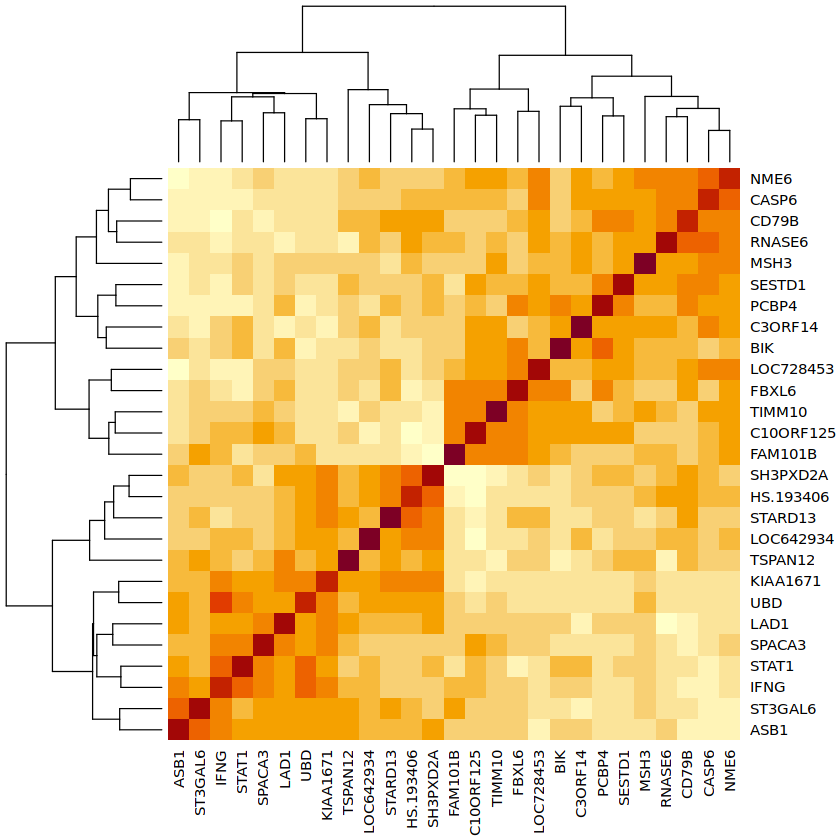

In [20]:
# Code cell n°16

heatmap(cor(t(norm_sig)))

- with the `corrplot()` function: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html   
that allows for many improvements of the rendering

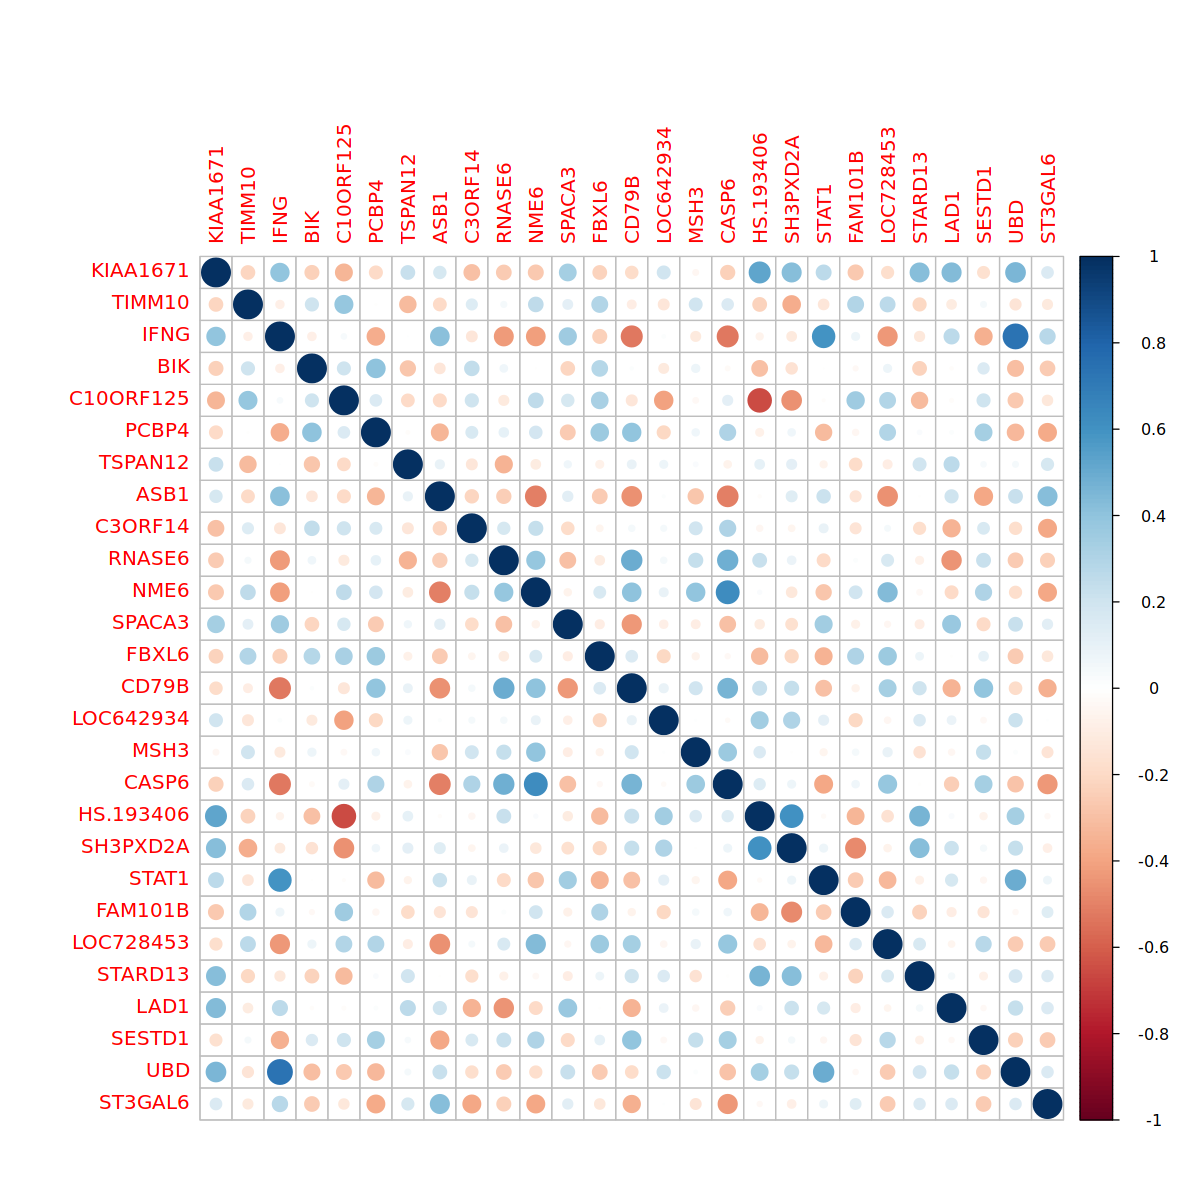

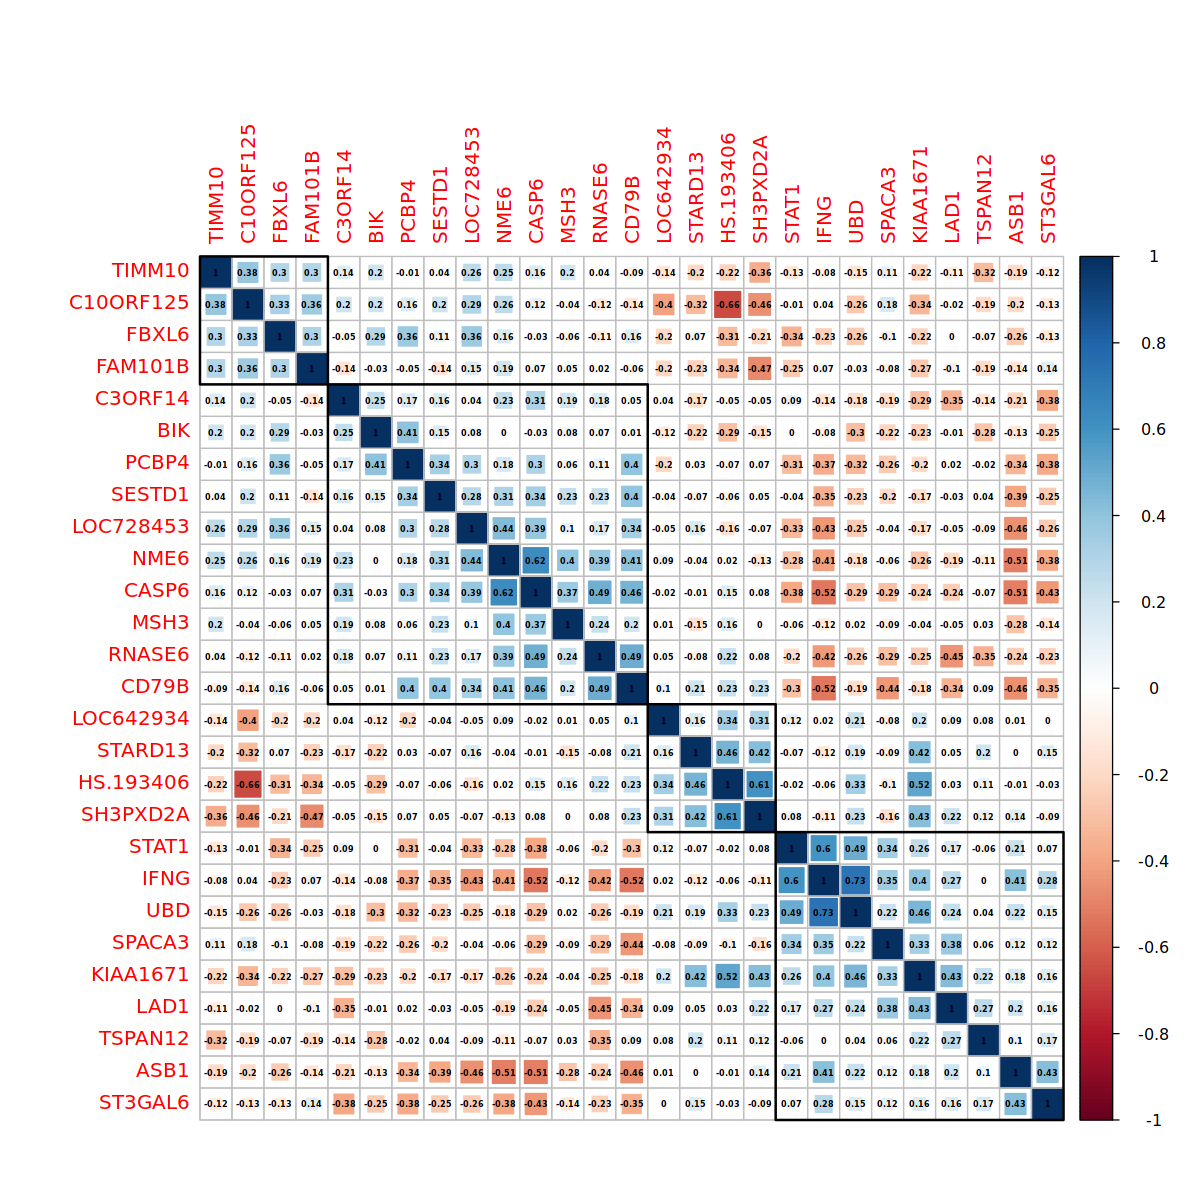

In [21]:
# Code cell n°17

options(repr.plot.width = 10, repr.plot.height = 10)
corrplot(cor(t(norm_sig)))

# method = "square" is the default 
# hclust clusterises the genes, grouping together the most correlated ones
# rectangles and correlation coefficients are also added
corrplot(cor(t(norm_sig)),
         method = "square",
         order = 'hclust',
         addrect = 4,
         addCoef.col = 'black',
         number.cex = 0.4)

<span style="color:blue"> => Find the arguments of the corrplot function in cell 18 with the only the upper matrix displayed and using an ellipse representative of each pair-wise correlation.</span>

In [ ]:
# Code cell n°18



- with the **rquery.cormat()** function using both **corrplot** and **heatmap** packages: 

This *all-in-one function* computes the correlation matrix with the correlation coefficients and pvalues of the correlation tests and draws the correlogram.


$r
           FBXL6 LOC728453 FAM101B  TIMM10 C10ORF125    MSH3 SESTD1    NME6   CASP6 RNASE6 CD79B C3ORF14     BIK  PCBP4 LOC642934 STARD13 KIAA1671 HS.193406 SH3PXD2A STAT1  IFNG   UBD SPACA3 LAD1
FBXL6          1                                                                                                                                                                                   
LOC728453   0.36         1                                                                                                                                                                         
FAM101B      0.3      0.15       1                                                                                                                                                                 
TIMM10       0.3      0.26     0.3       1                                                                                                                                                         
C10ORF125   0.33 

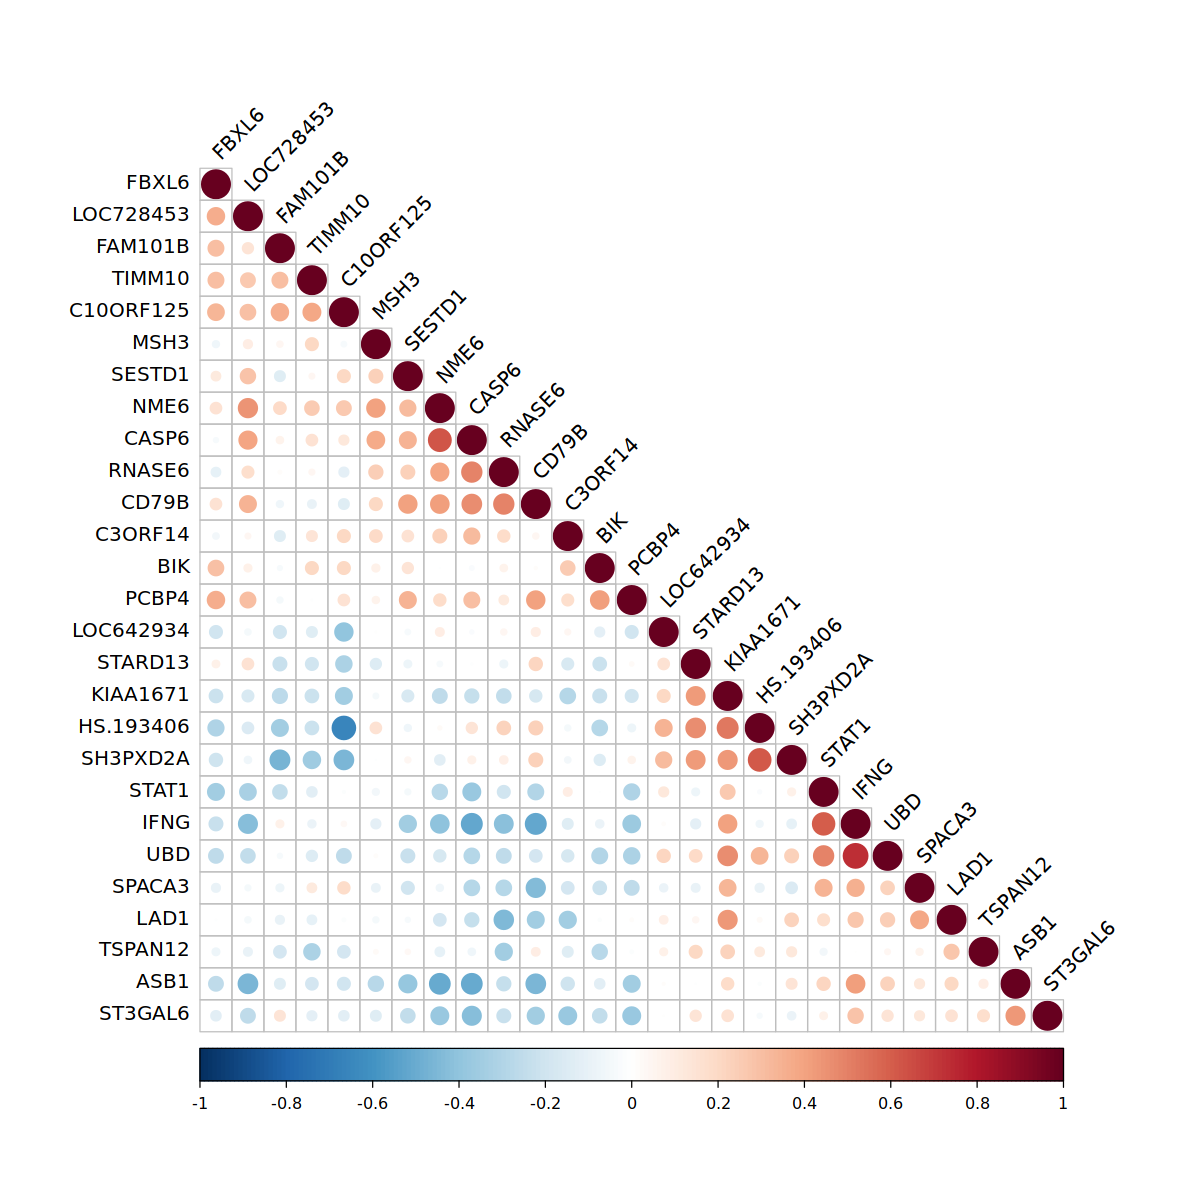

In [22]:
# Code cell n°19

source("http://www.sthda.com/upload/rquery_cormat.r")
options(width = 200)
rquery.cormat(t(norm_sig))

- with **ComplexHeatmap** package for example to add the -log10(pvalue) of the DGE analysis

We saw this package in the first session of this option.

<span style="color:blue"> => Find the commands to display the correlogram with the -log10 pvalues dispayed as an annotation using the ComplexHeatmap package.</span>

In [ ]:
# Code cell n°20



## 1.B. With packages that use ggplot2
---


- using **ggcorplot** package derived from corrplot : https://cran.r-project.org/web/packages/ggcorrplot/readme/README.html

See nice tuto: http://www.sthda.com/english/wiki/ggcorrplot-visualization-of-a-correlation-matrix-using-ggplot2 where you can color only the significant ones.

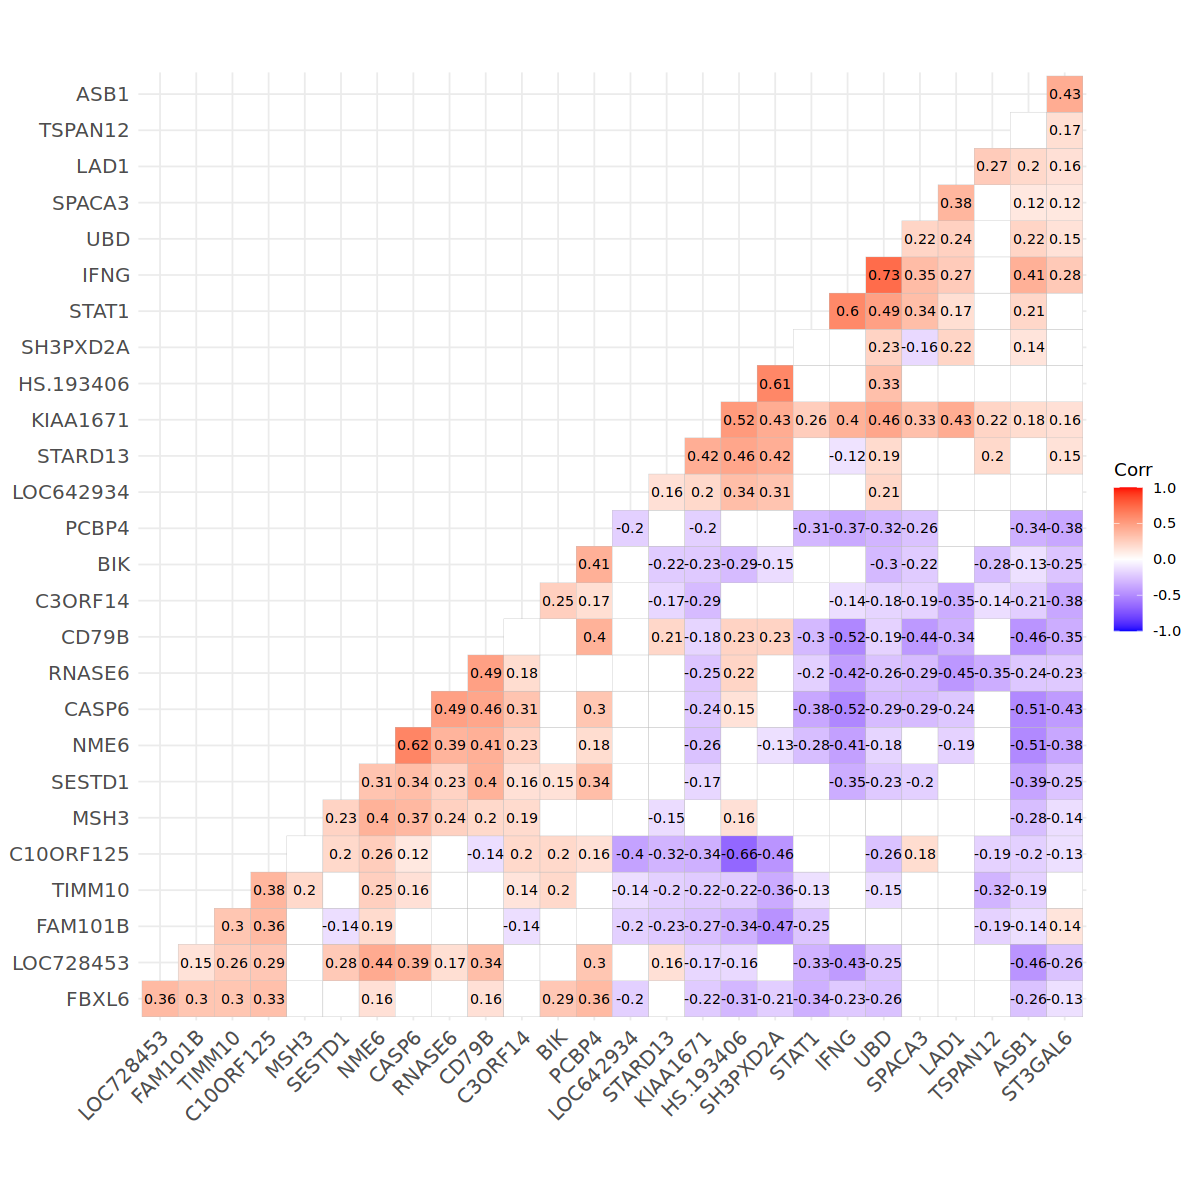

In [23]:
# Code cell n°21

ggcorrplot(cor(t(norm_sig)),
           p.mat = cor_pmat(t(norm_sig)) ,
           hc.order = TRUE,
           type = "lower",
           insig = "blank",
           lab = TRUE,
           lab_size = 3)

- using **ggcorr()** function from **GGally** package: https://briatte.github.io/ggcorr/ which allows to bin gradient colors and much more!

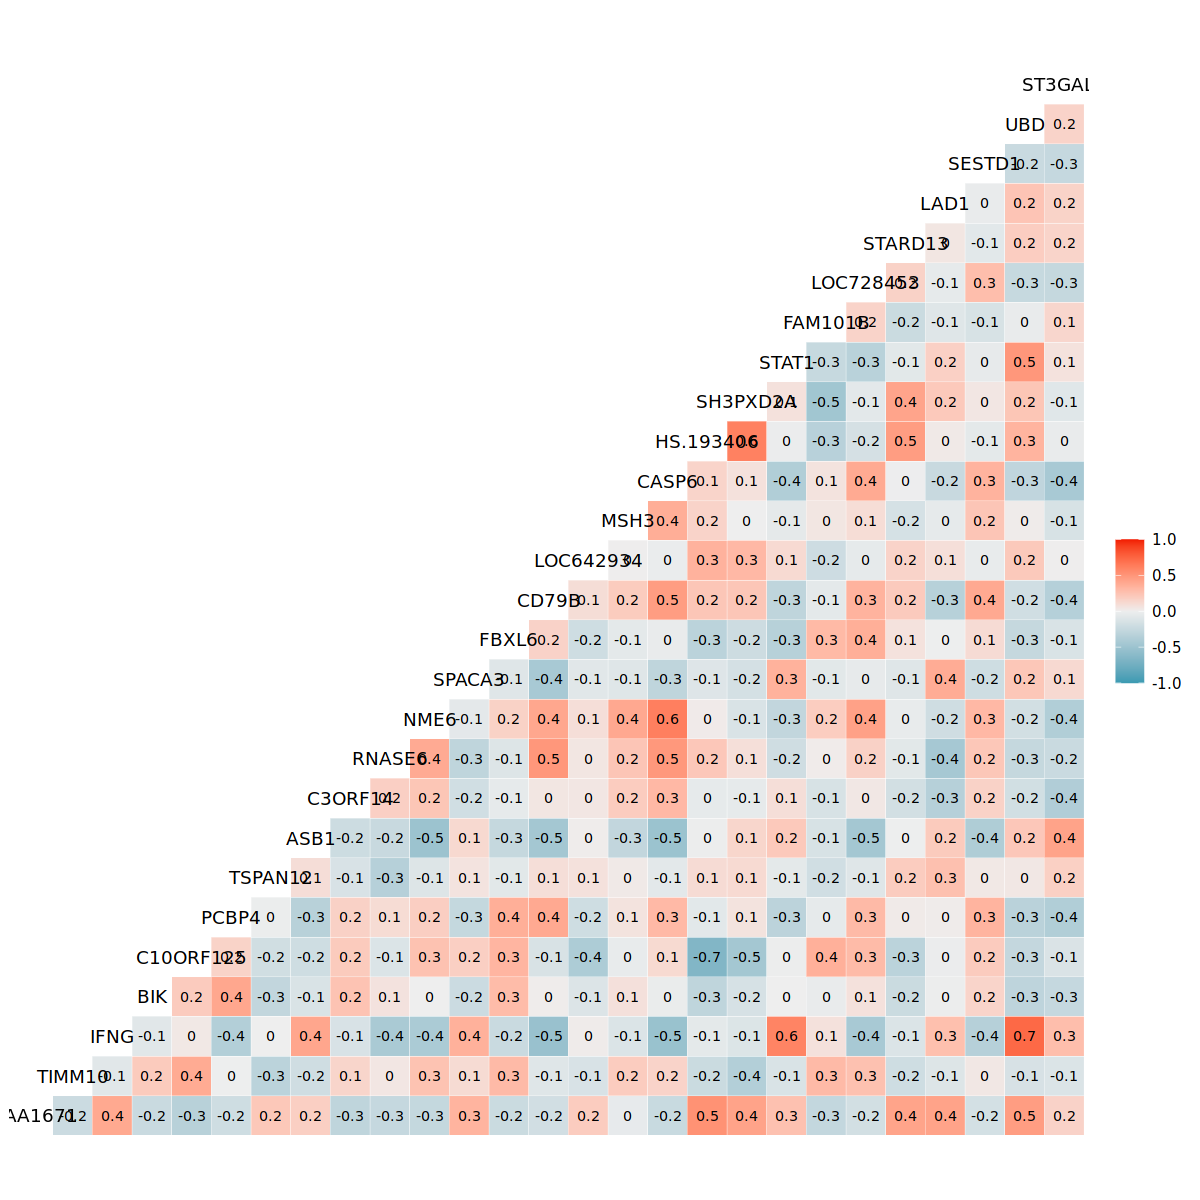

In [24]:
# Code cell n°22

# Pearson correlation coefficients, using pairwise observations (default method)
GGally::ggcorr(t(norm_sig),
               method = c("pairwise", "pearson"),
               label = TRUE,
               label_size = 3)

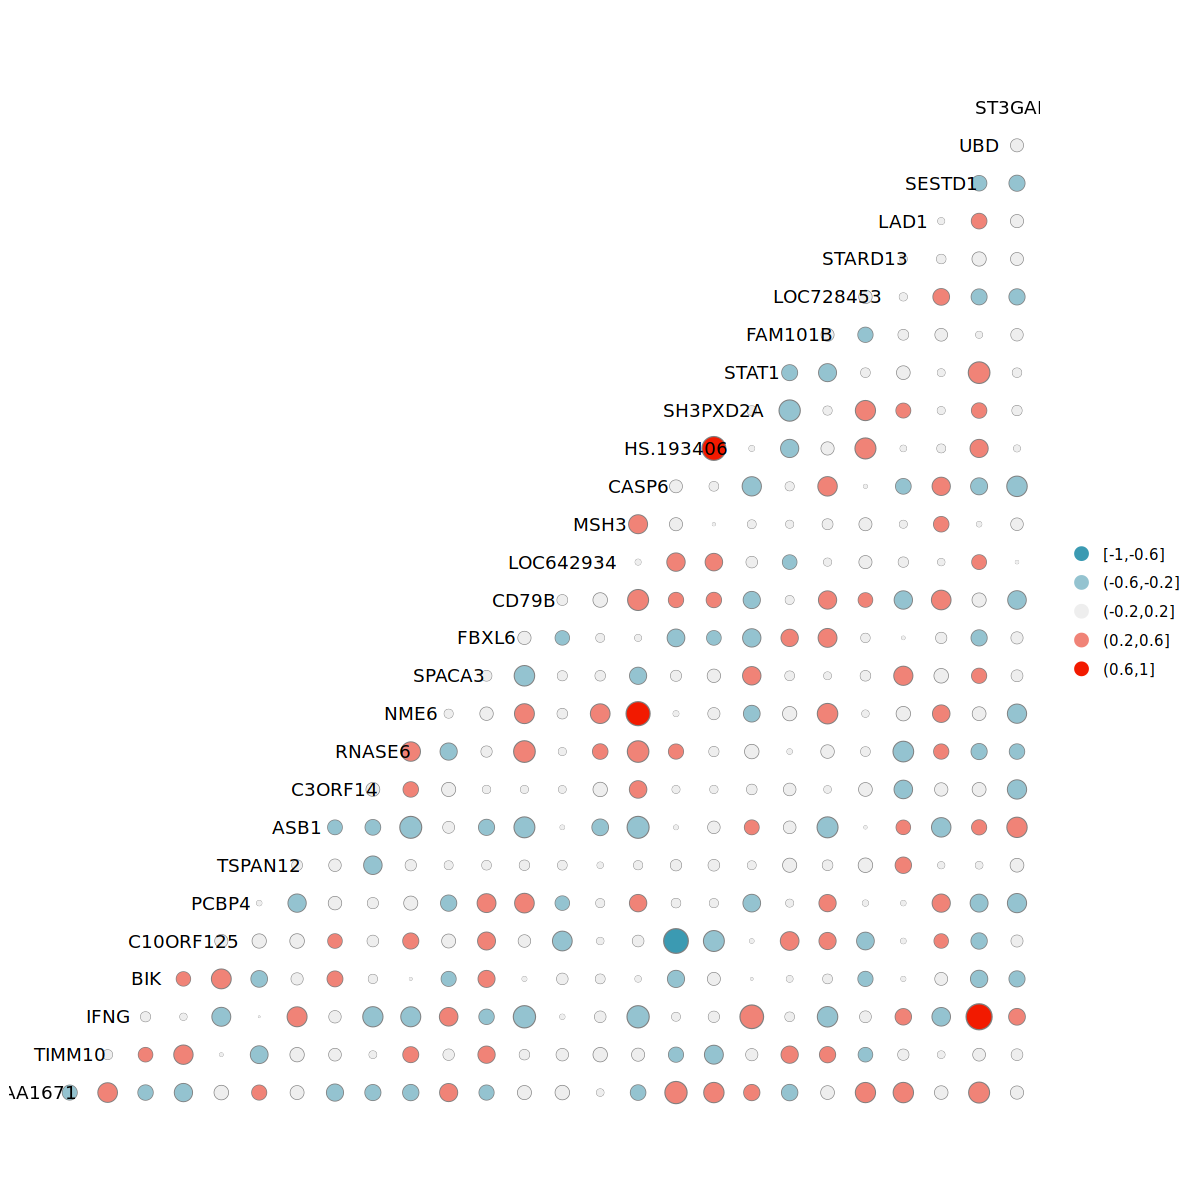

In [25]:
# Code cell n°23

GGally::ggcorr(t(norm_sig),
               method = c("pairwise", "pearson"),
               geom = "circle",
               nbreaks = 5,
               min_size = 0,
               max_size = 7)

- with **ggpairs()** of **GGally** package: it allows to display the scatter plot, density plot and the correlation coefficients for a few genes.

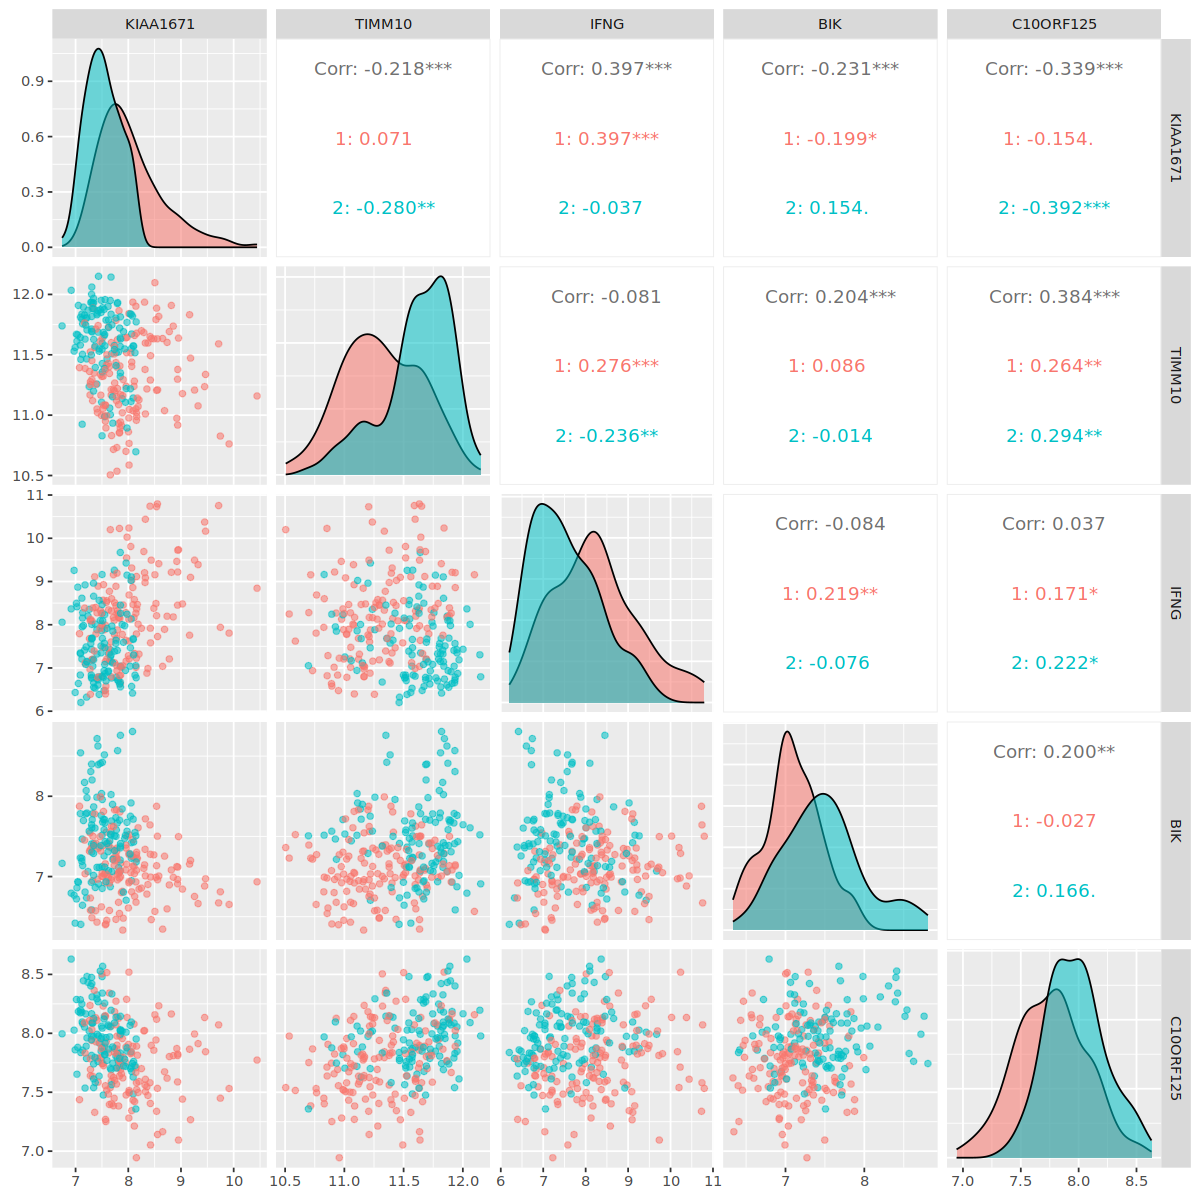

In [26]:
# Code cell n°24

GGally::ggpairs(as.data.frame(t(norm_sig)),
                columns = 1:5,
                ggplot2::aes(colour = samples_info$Status, alpha = 0.5)) 

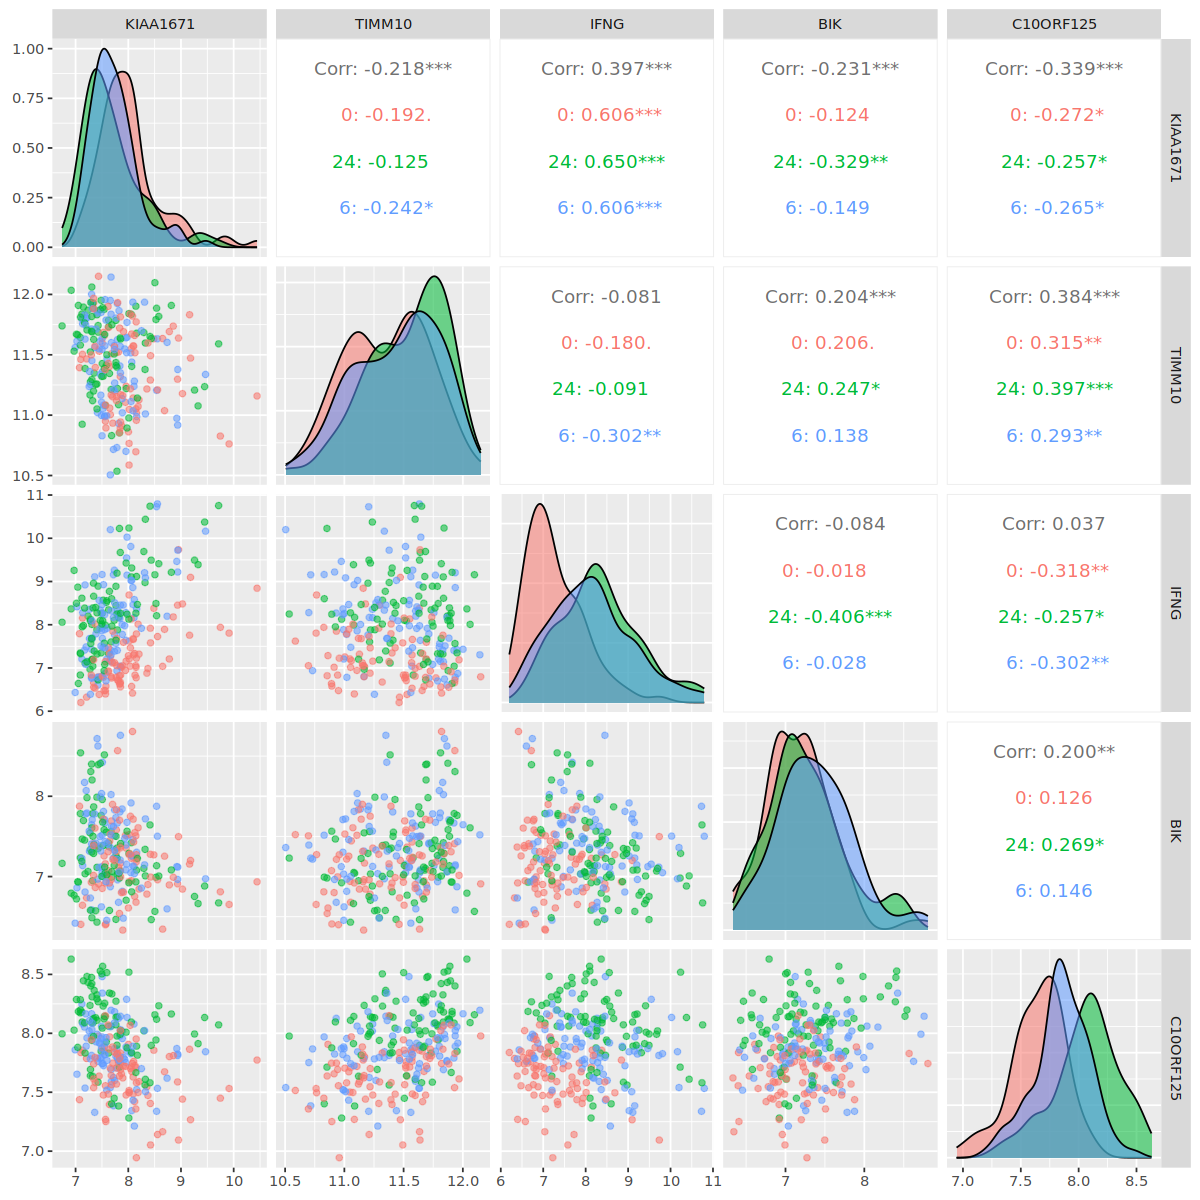

In [27]:
# Code cell n°25

GGally::ggpairs(as.data.frame(t(norm_sig)),
                columns = 1:5,
                ggplot2::aes(colour = samples_info$Stim, alpha = 0.5)) 

<span style="color:green"> => Explain the command of the above two code cells n°24 and 25<br></span>


## 1.C. Partial correlations
---

<div class="alert alert-block alert-info"><b><u>What are partial correlations ?</u></b><br><br>
    
If gene A is correlated with gene B, and if gene B is correlated with gene C, then it is most likely that gene A and C will be correlated.<br>
<b><i>Partial correlation of A and C is the one which is independant of the correlations with B.</i></b></span><br>
</div>

The **ppcor** package computes partial correlations.

Warning message in pcor(t(norm_sig)):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”


List of 6
 $ estimate : num [1:27, 1:27] 1 -0.00654 0.42944 0.04727 -0.04638 ...
 $ p.value  : num [1:27, 1:27] 0.00 9.20e-01 3.83e-12 4.67e-01 4.75e-01 ...
 $ statistic: num [1:27, 1:27] 0 -0.101 7.32 0.729 -0.715 ...
 $ n        : int 264
 $ gp       : num 25
 $ method   : chr "pearson"


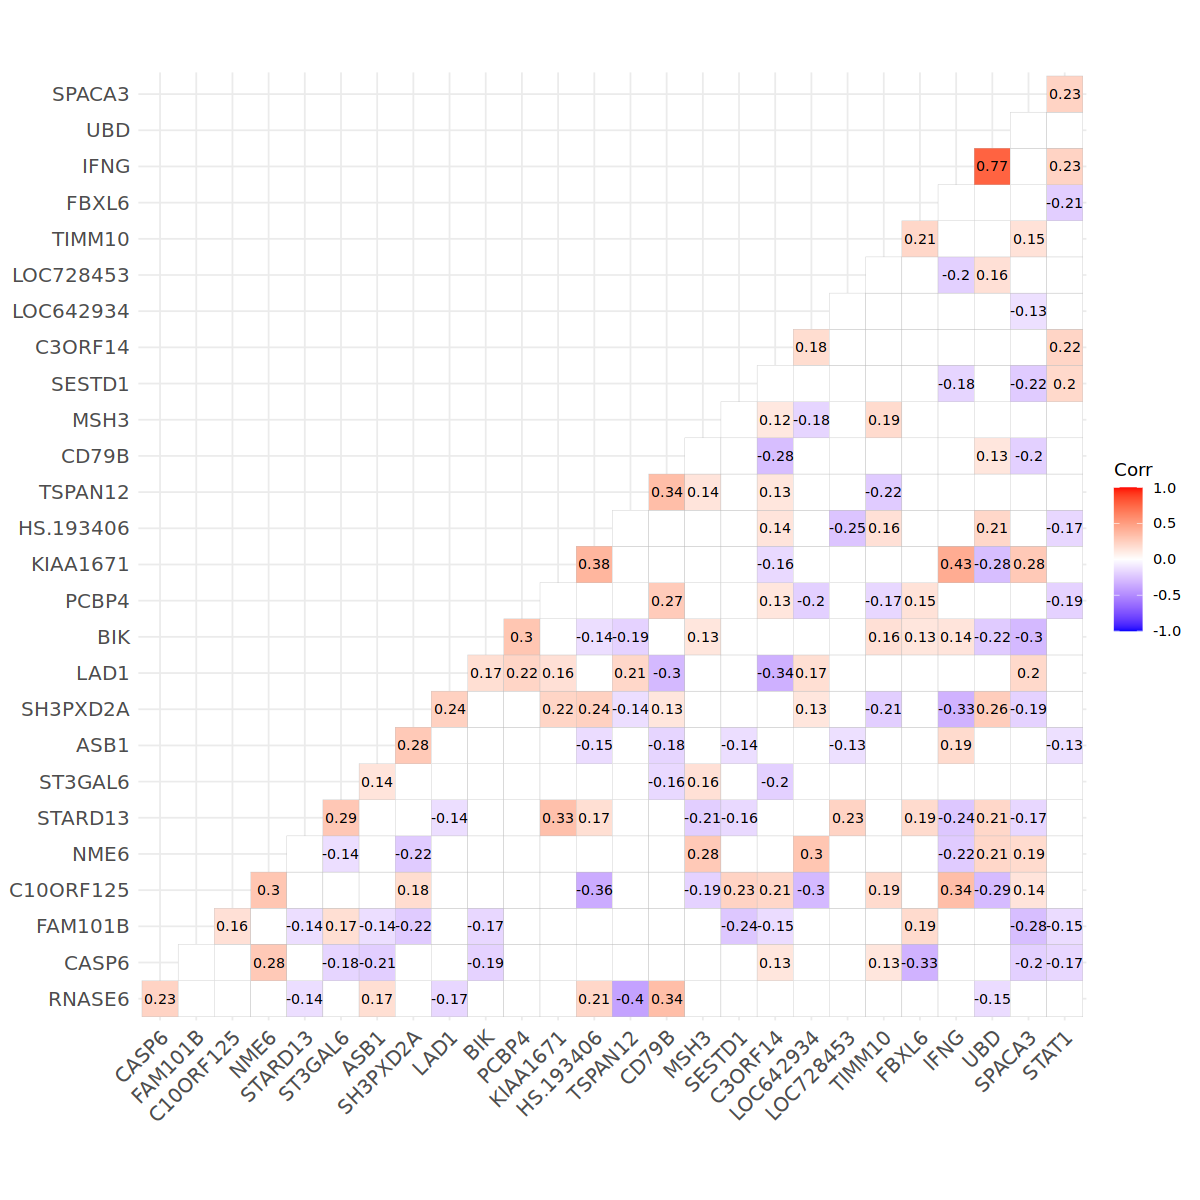

In [28]:
# Code cell n°26

res <- pcor(t(norm_sig))
str(res)
colnames(res[[1]]) <- row.names(norm_sig)
row.names(res[[1]]) <- row.names(norm_sig)
ggcorrplot(res[[1]],
           p.mat = res[[2]] ,
           hc.order = TRUE,
           type = "lower",
           insig = "blank",
           lab=TRUE,
           lab_size = 3)

<div class="alert alert-warning" role="alert"><b>Question</b><br>Which genes show the best correlations?</div>

--- 
---

# Part 2. ChIPseq on STAT1
---

*(estimated duration: 60 minutes)*

## 2.A. Get the data
---

We will focus on the **Transcription Factor STAT1** whose gene is significantly downregulated in patients compared to controls.

We will use data from *"Genome-wide profiles of STAT1 DNA association using chromatin immunoprecipitation and massively parallel sequencing" from Roberston G. et al. Nature Methods 2007 PMID: [17558387](https://pubmed.ncbi.nlm.nih.gov/17558387/); [DOI: 10.1038/nmeth1068](https://www.nature.com/articles/nmeth1068)*. It was amnong the very first papers analysing ChIPSeq data. In this dataset, they analysed Hela HeLa S3 cells that were stimulated or not with gamma-interferon.

The data are available on the GEO database with the ID: [GSE15353](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE15353). We will get the 4 supplemnatry files that are:

| File                                            | link                                                                                                                     | Size  | Unit |
|-------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|-------|------|
| GSE15353_STAT1_hg18_IFNg_ht11.peaks.txt         |https://ftp.ncbi.nlm.nih.gov/geo/series/GSE15nnn/GSE15353/suppl/GSE15353%5FSTAT1%5Fhg18%5FIFNg%5Fht11%2Epeaks%2Etxt        |   1.3 | Mb   |
| GSE15353_STAT1_hg18_IFNg_ht11.wig               | https://ftp.ncbi.nlm.nih.gov/geo/series/GSE15nnn/GSE15353/suppl/GSE15353%5FSTAT1%5Fhg18%5FIFNg%5Fht11%2Ewig                 |  96.2 | Mb   |
| GSE15353_STAT1_hg18_Unstimulated_ht11.peaks.txt | https://ftp.ncbi.nlm.nih.gov/geo/series/GSE15nnn/GSE15353/suppl/GSE15353%5FSTAT1%5Fhg18%5FUnstimulated%5Fht11%2Epeaks%2Etxt | 342.6 | Kb   |
| GSE15353_STAT1_hg18_Unstimulated_ht11.wig       | ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE15nnn/GSE15353/suppl/GSE15353%5FSTAT1%5Fhg18%5FUnstimulated%5Fht11%2Ewig        |  21.6 | Mb   |


<span style="color:red"> => Open a terminal and download each one with the <code>wget</code>  command followed by the link: bash commands below in your working directory.</span>

Have a look at the first rows of the `wig .txt` files with `less -SN filename`. They contain the STAT1 peaks with the height of the peaks and their genomic coordinates. For example, you can enter the following command in the terminal (use q to quit).

We import the text files in R.

In [29]:
# Code cell n°27

STAT1_unstim_peaks_hg18 <- read.table("GSE15353_STAT1_hg18_Unstimulated_ht11.peaks.txt", header=T)
str(STAT1_unstim_peaks_hg18)
STAT1_ifng_peaks_hg18 <- read.table("GSE15353_STAT1_hg18_IFNg_ht11.peaks.txt", header=T)
str(STAT1_ifng_peaks_hg18)

'data.frame':	11004 obs. of  6 variables:
 $ chr          : chr  "10" "10" "10" "10" ...
 $ height       : int  14 11 12 11 12 11 13 14 11 1935 ...
 $ start        : int  967275 2010523 2496490 3075739 3122866 3857309 4376424 4736305 4881845 5461184 ...
 $ end          : int  967866 2011422 2497023 3076124 3123854 3857940 4377362 4736905 4882581 5461374 ...
 $ numtags      : int  20 28 23 13 25 22 26 22 22 1936 ...
 $ max_ht_offset: int  379 374 214 130 394 192 349 226 150 43 ...
'data.frame':	41582 obs. of  6 variables:
 $ chr          : chr  "10" "10" "10" "10" ...
 $ height       : int  46 30 12 13 14 12 11 30 31 29 ...
 $ start        : int  142456 302744 389895 729167 1023827 1083937 1092125 1301013 1390001 1986088 ...
 $ end          : int  143253 303395 390540 729993 1024778 1085837 1093202 1301397 1392080 1987012 ...
 $ numtags      : int  74 44 23 27 28 70 30 36 94 76 ...
 $ max_ht_offset: int  414 405 338 371 539 1186 581 171 1716 494 ...


We will add an ID to each peak.

In [32]:
# Code cell n°28

STAT1_unstim_peaks_hg18$ID <- paste0("unstim_", 1:nrow(STAT1_unstim_peaks_hg18))
str(STAT1_unstim_peaks_hg18)
STAT1_ifng_peaks_hg18$ID <- paste0("ifng_", 1:nrow(STAT1_ifng_peaks_hg18))
str(STAT1_ifng_peaks_hg18)

'data.frame':	11004 obs. of  7 variables:
 $ chr          : chr  "10" "10" "10" "10" ...
 $ height       : int  14 11 12 11 12 11 13 14 11 1935 ...
 $ start        : int  967275 2010523 2496490 3075739 3122866 3857309 4376424 4736305 4881845 5461184 ...
 $ end          : int  967866 2011422 2497023 3076124 3123854 3857940 4377362 4736905 4882581 5461374 ...
 $ numtags      : int  20 28 23 13 25 22 26 22 22 1936 ...
 $ max_ht_offset: int  379 374 214 130 394 192 349 226 150 43 ...
 $ ID           : chr  "unstim_1" "unstim_2" "unstim_3" "unstim_4" ...
'data.frame':	41582 obs. of  7 variables:
 $ chr          : chr  "10" "10" "10" "10" ...
 $ height       : int  46 30 12 13 14 12 11 30 31 29 ...
 $ start        : int  142456 302744 389895 729167 1023827 1083937 1092125 1301013 1390001 1986088 ...
 $ end          : int  143253 303395 390540 729993 1024778 1085837 1093202 1301397 1392080 1987012 ...
 $ numtags      : int  74 44 23 27 28 70 30 36 94 76 ...
 $ max_ht_offset: int  414 405 338 

## 2.B. Convert to hg38 coordinates

<mark>Caution: the coordinates are on hg18</mark>

### 2.B.1. LiftOver at UCSC

The most popular method to do the conversion on hg38 is using the [UCSC liftOver tool](https://genome.ucsc.edu/cgi-bin/hgLiftOver).

To do so, you need to provide `.BED` files. A .BED file has 3 mandatory columns: the chromosome, the start and the end positions of the feature (see documentation here: https://genome.ucsc.edu/FAQ/FAQformat.html#format1)

Below are the commands to generate `.BED` corresponding to the `.txt̀ files.

In [33]:
# Code cell n°29

temp <- STAT1_unstim_peaks_hg18
temp$chr <- paste0("chr",temp$chr)
write.table(temp[,c(1,3:4,7,2,5:6)], file = "STAT1_unstim_peaks_hg18.bed", quote=F, sep="\t", row.names = FALSE, col.names = FALSE)

temp <- STAT1_ifng_peaks_hg18
temp$chr <- paste0("chr",temp$chr)
write.table(temp[,c(1,3:4,7,2,5:6)], file = "STAT1_ifng_peaks_hg18.bed", quote=F, sep="\t", row.names = FALSE, col.names = FALSE)

rm(temp)

<div class="alert alert-warning" role="alert"><b>LiftOver conversion at UCSC</b><br> 

=> Download the bed files and do the conversion between hg18 and hg38 on UCSC. Download the converted files by clicking on "View Conversions" in the "Results" section.

The names of the converted files will not be very informative. Please rename them:
- STAT1_unstim_peaks_hg38.bed
- STAT1_infg_peaks_hg38.bed

Then upload them to your working directory on adenine.
    
</div>

In [ ]:
# Code cell n°30

STAT1_unstim_peaks_hg38 <-read.table("STAT1_unstim_peaks_hg38.bed", sep="\t", header=F)
names(STAT1_unstim_peaks_hg38) <- names(STAT1_unstim_peaks_hg18)[c(1,3:4,7,2,5:6)]
str(STAT1_unstim_peaks_hg38)

In [ ]:
# Code cell n°31

STAT1_ifng_peaks_hg38 <-read.table("STAT1_ifng_peaks_hg38.bed", sep="\t", header=F)
names(STAT1_ifng_peaks_hg38) <- names(STAT1_ifng_peaks_hg18)[c(1,3:4,7,2,5:6)]
str(STAT1_ifng_peaks_hg38)

### 2.B.2. Conversion using `rtracklayer` package

The `liftOver` tool is implemented in the **rtracklayer** Bioconductor package (https://bioconductor.org/packages/release/bioc/html/rtracklayer.html.)
This package is dedicated to handle and generate tracks for the UCSC genome browser, or to query its genome database.

#### 2.B.2.1 Get the conversion chain between hg18 and hg38

UCSC stored conversion chains between genome assemblies.
On the UCSC download web page (http://hgdownload.soe.ucsc.edu/downloads.html), you need to find the link corresponding to the starting assembly and the chain file for you conversion of interest. Here we find the conversion chains strating from hg18 at this link: http://hgdownload.soe.ucsc.edu/goldenPath/hg18/liftOver/.

We are lucky the chain to hg38 is avalaible: http://hgdownload.soe.ucsc.edu/goldenPath/hg18/liftOver/hg18ToHg38.over.chain.gz

However, if you want to convert to an assembly which is not listed here, for example the T2T genome, you have to do a conversion to an intermediate assembly.

<span style="color:red"> => Open a terminal and download this chain gunzipped file with the <code>wget</code> command followed by the link: bash commands below in your working directory.
Then unzip it prior to importing it to R with rtraklayer. </span>

In [34]:
# Code cell n°32

chain <- rtracklayer::import.chain("./hg18ToHg38.over.chain")
names(chain)

[1] "chr22" "chr21" "chr19" "chr20" "chr18" "chrY"  "chr17" "chrX"  "chr16" "chr15" "chr14" "chr13" "chr12" "chr11" "chr10" "chrM"  "chr9"  "chr8"  "chr7"  "chr6"  "chr5"  "chr4"  "chr3"  "chr2" 
[25] "chr1"

#### 2.B.2.1 Peaks GR


As you can notice, chromosome names have the "chr" prefix, while our STAT1 peaks objects have not. We thus homogeneize chromosome names in our peak dataframes by adding "chr.

In [35]:
# Code cell n°33

STAT1_unstim_peaks_hg18$chr <- paste0("chr", STAT1_unstim_peaks_hg18$chr)
STAT1_ifng_peaks_hg18$chr <- paste0("chr", STAT1_ifng_peaks_hg18$chr)

To use the `liftOver` function of rtracklayer, the imput file we want to convert has to be a genomic object of class GRanges from package`GenomicRanges`, as we have seen them in R session 5 in the `R5_tuto_packages.ipynb`.
The `makeGRangesFromDataFrame`function generate these GR objects.

In [36]:
# Code cell n°34

STAT1_unstim_peaks_hg18GR <- makeGRangesFromDataFrame(STAT1_unstim_peaks_hg18, keep.extra.columns = TRUE)
str(STAT1_unstim_peaks_hg18GR)

Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 24 levels "chr1","chr2",..: 10 11 12 13 14 15 16 17 18 19 ...
  .. .. ..@ lengths        : int [1:24] 535 450 653 159 221 388 579 602 104 416 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:11004] 967275 2010523 2496490 3075739 3122866 3857309 4376424 4736305 4881845 5461184 ...
  .. .. ..@ width          : int [1:11004] 592 900 534 386 989 632 939 601 737 191 ...
  .. .. ..@ NAMES          : NULL
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 3
  .. .. ..@ lengths        : int 1

In [37]:
# Code cell n°35
head(STAT1_unstim_peaks_hg18GR)

GRanges object with 6 ranges and 4 metadata columns:
      seqnames          ranges strand |    height   numtags max_ht_offset          ID
         <Rle>       <IRanges>  <Rle> | <integer> <integer>     <integer> <character>
  [1]    chr10   967275-967866      * |        14        20           379    unstim_1
  [2]    chr10 2010523-2011422      * |        11        28           374    unstim_2
  [3]    chr10 2496490-2497023      * |        12        23           214    unstim_3
  [4]    chr10 3075739-3076124      * |        11        13           130    unstim_4
  [5]    chr10 3122866-3123854      * |        12        25           394    unstim_5
  [6]    chr10 3857309-3857940      * |        11        22           192    unstim_6
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [38]:
# Code cell n°36

STAT1_ifng_peaks_hg18GR <- makeGRangesFromDataFrame(STAT1_ifng_peaks_hg18, keep.extra.columns = TRUE)
str(STAT1_ifng_peaks_hg18GR)

Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 24 levels "chr1","chr2",..: 10 11 12 13 14 15 16 17 18 19 ...
  .. .. ..@ lengths        : int [1:24] 1981 1808 2280 850 1062 1435 1572 2004 725 1346 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:41582] 142456 302744 389895 729167 1023827 1083937 1092125 1301013 1390001 1986088 ...
  .. .. ..@ width          : int [1:41582] 798 652 646 827 952 1901 1078 385 2080 925 ...
  .. .. ..@ NAMES          : NULL
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 3
  .. .. ..@ lengths       

In [39]:
# Code cell n°37

head(STAT1_ifng_peaks_hg18GR)

GRanges object with 6 ranges and 4 metadata columns:
      seqnames          ranges strand |    height   numtags max_ht_offset          ID
         <Rle>       <IRanges>  <Rle> | <integer> <integer>     <integer> <character>
  [1]    chr10   142456-143253      * |        46        74           414      ifng_1
  [2]    chr10   302744-303395      * |        30        44           405      ifng_2
  [3]    chr10   389895-390540      * |        12        23           338      ifng_3
  [4]    chr10   729167-729993      * |        13        27           371      ifng_4
  [5]    chr10 1023827-1024778      * |        14        28           539      ifng_5
  [6]    chr10 1083937-1085837      * |        12        70          1186      ifng_6
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

#### 2.B.2.1 LiftOver with `rtraclayer`

Now we can convert the coordinates with the liftover function.


In [40]:
# Code cell n°38

STAT1_unstim_peaks_hg38GR <- unlist(rtracklayer::liftOver(STAT1_unstim_peaks_hg18GR, chain))
head(STAT1_unstim_peaks_hg38GR)
STAT1_ifng_peaks_hg38GR <- unlist(rtracklayer::liftOver(STAT1_ifng_peaks_hg18GR, chain))
head(STAT1_ifng_peaks_hg38GR)

GRanges object with 6 ranges and 4 metadata columns:
      seqnames          ranges strand |    height   numtags max_ht_offset          ID
         <Rle>       <IRanges>  <Rle> | <integer> <integer>     <integer> <character>
  [1]    chr10   931335-931926      * |        14        20           379    unstim_1
  [2]    chr10 1978329-1979228      * |        11        28           374    unstim_2
  [3]    chr10 2464298-2464831      * |        12        23           214    unstim_3
  [4]    chr10 3043547-3043932      * |        11        13           130    unstim_4
  [5]    chr10 3090674-3091662      * |        12        25           394    unstim_5
  [6]    chr10 3825117-3825748      * |        11        22           192    unstim_6
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

GRanges object with 6 ranges and 4 metadata columns:
      seqnames          ranges strand |    height   numtags max_ht_offset          ID
         <Rle>       <IRanges>  <Rle> | <integer> <integer>     <integer> <character>
  [1]    chr10   106516-107313      * |        46        74           414      ifng_1
  [2]    chr10   266804-267455      * |        30        44           405      ifng_2
  [3]    chr10   353955-354600      * |        12        23           338      ifng_3
  [4]    chr10   693227-694053      * |        13        27           371      ifng_4
  [5]    chr10   987887-988838      * |        14        28           539      ifng_5
  [6]    chr10 1047997-1049897      * |        12        70          1186      ifng_6
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

If you did the conversion with the UCSC tool online, you should find the same coordinates, as you can check for the first 6 peaks.

In [41]:
# Code cell n°39

head(STAT1_unstim_peaks_hg38)
head(STAT1_ifng_peaks_hg38)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'STAT1_unstim_peaks_hg38' not found


If needed for further analyses, you can convert GRanges objects to dataframes using `as.data.frame()`.

## 2.C. Identify adjacent genes in a 20kb window

---

To do so, we could use the **biomaRt** package as we used it in R session 5 in the `R5_tuto_packages.ipynb`. 

- We get the ENSEMBL database on hg38 using BiomaRt

In [42]:
# Code cell n°40

listMarts(host = "www.ensembl.org")
ensembl <- useMart("ENSEMBL_MART_ENSEMBL", host = "www.ensembl.org", dataset = "hsapiens_gene_ensembl")

Warning message:
“Ensembl will soon enforce the use of https.
Ensure the 'host' argument includes "https://"”


biomart,version
<chr>,<chr>
ENSEMBL_MART_ENSEMBL,Ensembl Genes 108
ENSEMBL_MART_MOUSE,Mouse strains 108
ENSEMBL_MART_SNP,Ensembl Variation 108
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 108


Warning message:
“Ensembl will soon enforce the use of https.
Ensure the 'host' argument includes "https://"”


- And we interrogate the ENSEMBL database for each peak. 

<div class="alert alert-block alert-danger"><b>Caution:</b><br>
The next two chunks are "raw". Do not run them during this session. The process is very slow: several hours to get the results for unstimulated peaks.
    </div>

## 2.D. Identify the nearest gene
---

To do so, we will use the **GenomicRanges** package.

### 2.D.1. Gene annotations GR

We now need a GenomicRanges object with the gene annotations.


- We can use directly an annotation dataset on hg18 that is available as part of the **GeneBreak** BioConductor package.

In [43]:
# Code cell n°41

data(ens.gene.ann.hg18 )
str(ens.gene.ann.hg18)

'data.frame':	21604 obs. of  7 variables:
 $ Gene      : chr  "MIRN1302-2" "FAM138E" "FAM138E" "FAM138A" ...
 $ EnsID     : chr  "ENSG00000221311" "ENSG00000222027" "ENSG00000222003" "ENSG00000222003" ...
 $ Chromosome: chr  "1" "1" "1" "1" ...
 $ Start     : int  20229 24417 24417 24417 58954 357522 610959 742614 850393 869459 ...
 $ End       : int  20366 25944 25944 25944 59871 358460 611897 745077 869824 884494 ...
 $ band      : chr  "p36.33" "p36.33" "p36.33" "p36.33" ...
 $ strand    : int  1 -1 -1 -1 1 1 -1 1 1 -1 ...


For homogeneity with other GR objects, we add "chr" to name chromosomes.

In [44]:
# Code cell n°42

ens.gene.ann.hg18$Chromosome <- paste0("chr", ens.gene.ann.hg18$Chromosome)
head(ens.gene.ann.hg18)

,Gene,EnsID,Chromosome,Start,End,band,strand
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
21297,MIRN1302-2,ENSG00000221311,chr1,20229,20366,p36.33,1
21,FAM138E,ENSG00000222027,chr1,24417,25944,p36.33,-1
827,FAM138E,ENSG00000222003,chr1,24417,25944,p36.33,-1
828,FAM138A,ENSG00000222003,chr1,24417,25944,p36.33,-1
829,OR4F5,ENSG00000177693,chr1,58954,59871,p36.33,1
830,OR4F29,ENSG00000177799,chr1,357522,358460,p36.33,1


In [45]:
# Code cell n°43

ens.gene.ann.hg18 <- ens.gene.ann.hg18[! duplicated(ens.gene.ann.hg18$Gene),]

To read it as a GenomicRanges object, we need to convert the strand encoding.

In [46]:
# Code cell n°44

ens.gene.ann.hg18$strand <- ifelse(ens.gene.ann.hg18$strand == 1, '+', '-')
ens.gene.ann.hg18GR <-makeGRangesFromDataFrame(ens.gene.ann.hg18, keep.extra.columns = TRUE)
str(ens.gene.ann.hg18GR)

Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 24 levels "chr1","chr2",..: 1 10 11 12 13 14 15 16 17 18 ...
  .. .. ..@ lengths        : int [1:24] 2221 818 1337 1048 360 806 669 812 1205 271 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:21090] 20229 24417 24417 58954 357522 610959 742614 850393 869459 885830 ...
  .. .. ..@ width          : int [1:21090] 138 1528 1528 918 939 939 2464 19432 15036 5129 ...
  .. .. ..@ NAMES          : chr [1:21090] "21297" "21" "828" "829" ...
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 

In [47]:
# Code cell n°45

head(ens.gene.ann.hg18GR)

GRanges object with 6 ranges and 3 metadata columns:
        seqnames        ranges strand |        Gene           EnsID        band
           <Rle>     <IRanges>  <Rle> | <character>     <character> <character>
  21297     chr1   20229-20366      + |  MIRN1302-2 ENSG00000221311      p36.33
     21     chr1   24417-25944      - |     FAM138E ENSG00000222027      p36.33
    828     chr1   24417-25944      - |     FAM138A ENSG00000222003      p36.33
    829     chr1   58954-59871      + |       OR4F5 ENSG00000177693      p36.33
    830     chr1 357522-358460      + |      OR4F29 ENSG00000177799      p36.33
    831     chr1 610959-611897      - |      OR4F16 ENSG00000185097      p36.33
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

It is worth noting that some genes are not present in our DE object:

In [48]:
# Code cell n°46

length(intersect(ens.gene.ann.hg18$Gene, DE$TargetID))
length(setdiff(ens.gene.ann.hg18$Gene, DE$TargetID))
length(setdiff(DE$TargetID, ens.gene.ann.hg18$Gene))

[1] 17735

[1] 3355

[1] 16959

- We can also get the annotations on hg38 with another package **org.Hs.eg.db**

In [49]:
# Code cell n°47

suppressWarnings(ens.gene.ann.hg38 <-  select(org.Hs.eg.db,
       keys = keys(org.Hs.egENSEMBL2EG),
       columns=c("ENSEMBL","ENTREZID","SYMBOL","GENENAME", "CHRLOC","CHRLOCEND"),
       keytype="ENSEMBL"))
head(ens.gene.ann.hg38)

'select()' returned 1:many mapping between keys and columns



,ENSEMBL,ENTREZID,SYMBOL,GENENAME,CHRLOC,CHRLOCCHR,CHRLOCEND
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,ENSG00000121410,1,A1BG,alpha-1-B glycoprotein,-58345182,19,-58353492
2,ENSG00000175899,2,A2M,alpha-2-macroglobulin,-9067707,12,-9115919
3,ENSG00000175899,2,A2M,alpha-2-macroglobulin,-9067707,12,-9116229
4,ENSG00000256069,3,A2MP1,alpha-2-macroglobulin pseudogene 1,-9228532,12,-9234207
5,ENSG00000171428,9,NAT1,N-acetyltransferase 1,18210108,8,18223689
6,ENSG00000171428,9,NAT1,N-acetyltransferase 1,18170466,8,18223689


We rename the chromosome, start and end columns to be read by GenomicRanges and we also generate a strand column based on the sign of the geomic coordinates.

In [50]:
# Code cell n°48

names(ens.gene.ann.hg38)[5:7] <- c("start", "chr", "end")
ens.gene.ann.hg38$strand <- ifelse(ens.gene.ann.hg38$start > 0 , '+', '-')
ens.gene.ann.hg38$start <- abs(ens.gene.ann.hg38$start)
ens.gene.ann.hg38$end <- abs(ens.gene.ann.hg38$end)
ens.gene.ann.hg38 <- ens.gene.ann.hg38[,c(1:4,6,5,7:8)]
head(ens.gene.ann.hg38)

,ENSEMBL,ENTREZID,SYMBOL,GENENAME,chr,start,end,strand
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,ENSG00000121410,1,A1BG,alpha-1-B glycoprotein,19,58345182,58353492,-
2,ENSG00000175899,2,A2M,alpha-2-macroglobulin,12,9067707,9115919,-
3,ENSG00000175899,2,A2M,alpha-2-macroglobulin,12,9067707,9116229,-
4,ENSG00000256069,3,A2MP1,alpha-2-macroglobulin pseudogene 1,12,9228532,9234207,-
5,ENSG00000171428,9,NAT1,N-acetyltransferase 1,8,18210108,18223689,+
6,ENSG00000171428,9,NAT1,N-acetyltransferase 1,8,18170466,18223689,+


Some genes have no coordinates, so we remove them.

In [51]:
# Code cell n°49

ens.gene.ann.hg38 <- subset(ens.gene.ann.hg38, ! is.na(chr))

For homogeneity with other GR objects, we add "chr" to name chromosomes.

In [52]:
# Code cell n°50

ens.gene.ann.hg38$chr <- paste0("chr", ens.gene.ann.hg38$chr)
head(ens.gene.ann.hg38)

,ENSEMBL,ENTREZID,SYMBOL,GENENAME,chr,start,end,strand
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,ENSG00000121410,1,A1BG,alpha-1-B glycoprotein,chr19,58345182,58353492,-
2,ENSG00000175899,2,A2M,alpha-2-macroglobulin,chr12,9067707,9115919,-
3,ENSG00000175899,2,A2M,alpha-2-macroglobulin,chr12,9067707,9116229,-
4,ENSG00000256069,3,A2MP1,alpha-2-macroglobulin pseudogene 1,chr12,9228532,9234207,-
5,ENSG00000171428,9,NAT1,N-acetyltransferase 1,chr8,18210108,18223689,+
6,ENSG00000171428,9,NAT1,N-acetyltransferase 1,chr8,18170466,18223689,+


In [53]:
# Code cell n°51

ens.gene.ann.hg38 <- ens.gene.ann.hg38[! duplicated(ens.gene.ann.hg38$SYMBOL),]

In [54]:
# Code cell n°52

ens.gene.ann.hg38GR <- makeGRangesFromDataFrame(ens.gene.ann.hg38, keep.extra.columns = TRUE)
head(ens.gene.ann.hg38GR)

GRanges object with 6 ranges and 4 metadata columns:
     seqnames            ranges strand |         ENSEMBL    ENTREZID      SYMBOL               GENENAME
        <Rle>         <IRanges>  <Rle> |     <character> <character> <character>            <character>
   1    chr19 58345182-58353492      - | ENSG00000121410           1        A1BG alpha-1-B glycoprotein
   2    chr12   9067707-9115919      - | ENSG00000175899           2         A2M  alpha-2-macroglobulin
   4    chr12   9228532-9234207      - | ENSG00000256069           3       A2MP1 alpha-2-macroglobuli..
   5     chr8 18210108-18223689      + | ENSG00000171428           9        NAT1  N-acetyltransferase 1
   9     chr8 18391281-18401215      + | ENSG00000156006          10        NAT2  N-acetyltransferase 2
  10    chr14 94612390-94624053      + | ENSG00000196136          12    SERPINA3 serpin family A memb..
  -------
  seqinfo: 200 sequences from an unspecified genome; no seqlengths

Again, we have differences with some genes that are not present in our DE object and vice versa.

In [55]:
# Code cell n°53

length(intersect(ens.gene.ann.hg38$SYMBOL, DE$TargetID))
length(setdiff(ens.gene.ann.hg38$SYMBOL, DE$TargetID))
length(setdiff(DE$TargetID, ens.gene.ann.hg38$SYMBOL))

[1] 17284

[1] 8686

[1] 17410

### 2.D.2. Finding nearest genes
---

The `distanceToNearest()` function of GenomicRanges directly returns the nearest features (present in a subject dataset, here the genes) from a query (here the peaks) and computes the distances between pairwise elements.

- with unstimulated peaks

In [56]:
# Code cell n°54

dists_unstim_hg18 <- suppressWarnings(distanceToNearest(STAT1_unstim_peaks_hg18GR, ens.gene.ann.hg18GR))
head(dists_unstim_hg18)

Hits object with 6 hits and 1 metadata column:
      queryHits subjectHits |  distance
      <integer>   <integer> | <integer>
  [1]         1        2226 |         0
  [2]         2        2231 |    240852
  [3]         3        2232 |    602716
  [4]         4        2232 |     23615
  [5]         5        2232 |         0
  [6]         6        2234 |     39853
  -------
  queryLength: 11004 / subjectLength: 21090

In [58]:
# Code cell n°55

dists_unstim_hg38 <- suppressWarnings(distanceToNearest(STAT1_unstim_peaks_hg38GR, ens.gene.ann.hg38GR))
head(dists_unstim_hg38)

Hits object with 6 hits and 1 metadata column:
      queryHits subjectHits |  distance
      <integer>   <integer> | <integer>
  [1]         1        8186 |         0
  [2]         2       24912 |     96789
  [3]         3       24912 |    388208
  [4]         4        3514 |     25255
  [5]         5        3514 |         0
  [6]         6       25604 |      8200
  -------
  queryLength: 11242 / subjectLength: 25970

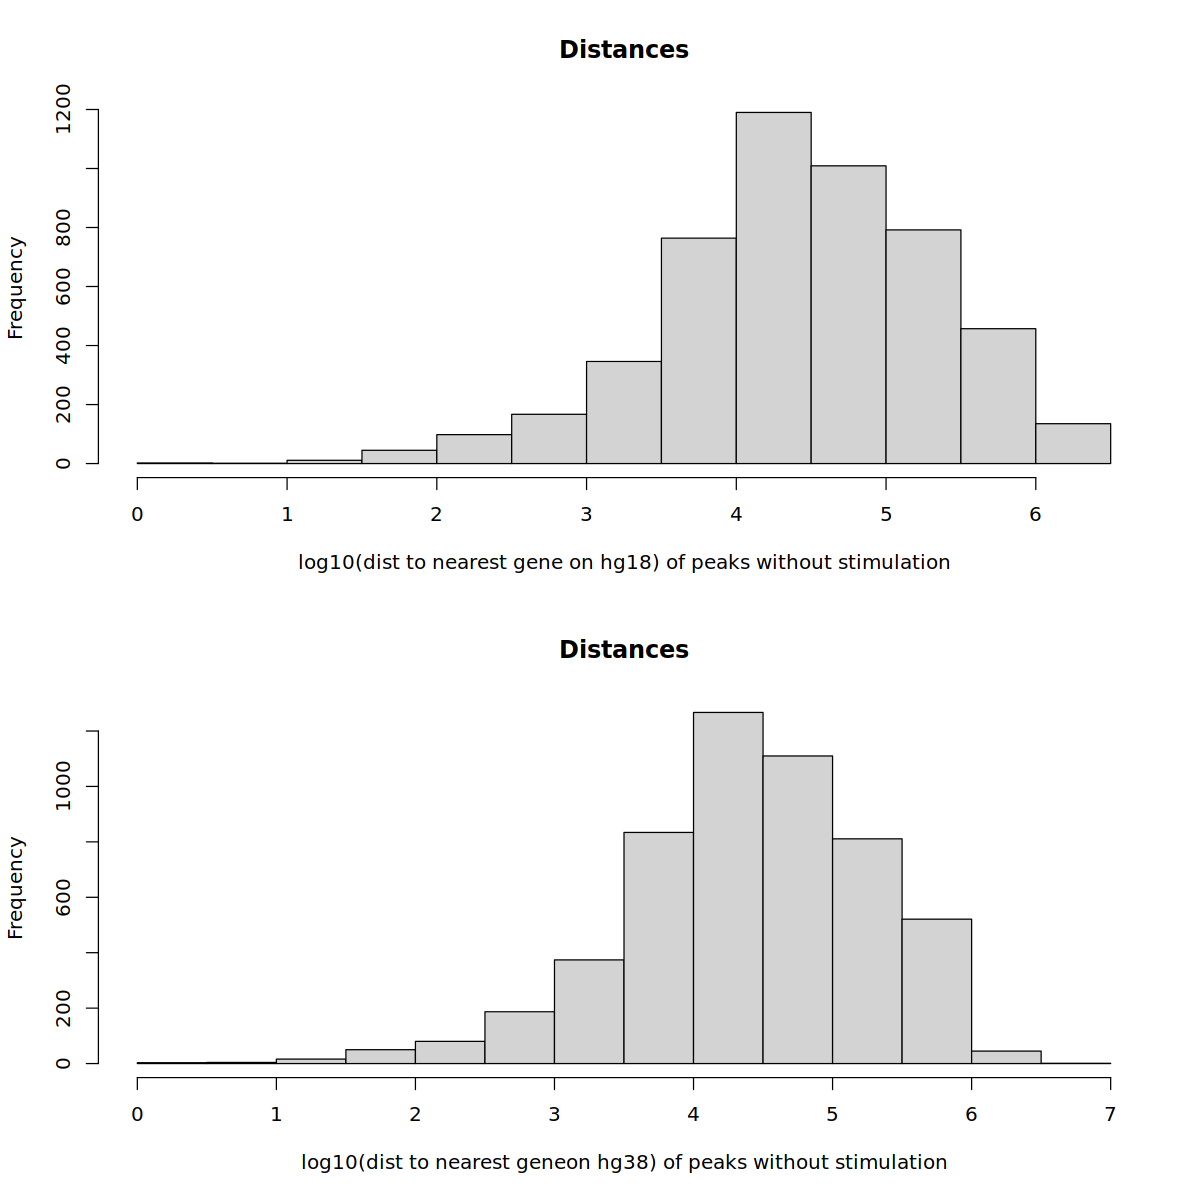

In [59]:
# Code cell n°56

par(mfrow = c(2,1))
dist2plot <- mcols(dists_unstim_hg18)[,1]
hist(log10(dist2plot), xlab = "log10(dist to nearest gene on hg18) of peaks without stimulation",
     main = "Distances")
dist2plot <- mcols(dists_unstim_hg38)[,1]
hist(log10(dist2plot), xlab = "log10(dist to nearest geneon hg38) of peaks without stimulation",
     main = "Distances")

- with IFNG peaks

In [60]:
# Code cell n°57

dists_ifng_hg18 <- suppressWarnings(distanceToNearest(STAT1_ifng_peaks_hg18GR, ens.gene.ann.hg18GR))
dists_ifng_hg38 <- suppressWarnings(distanceToNearest(STAT1_ifng_peaks_hg38GR, ens.gene.ann.hg38GR))

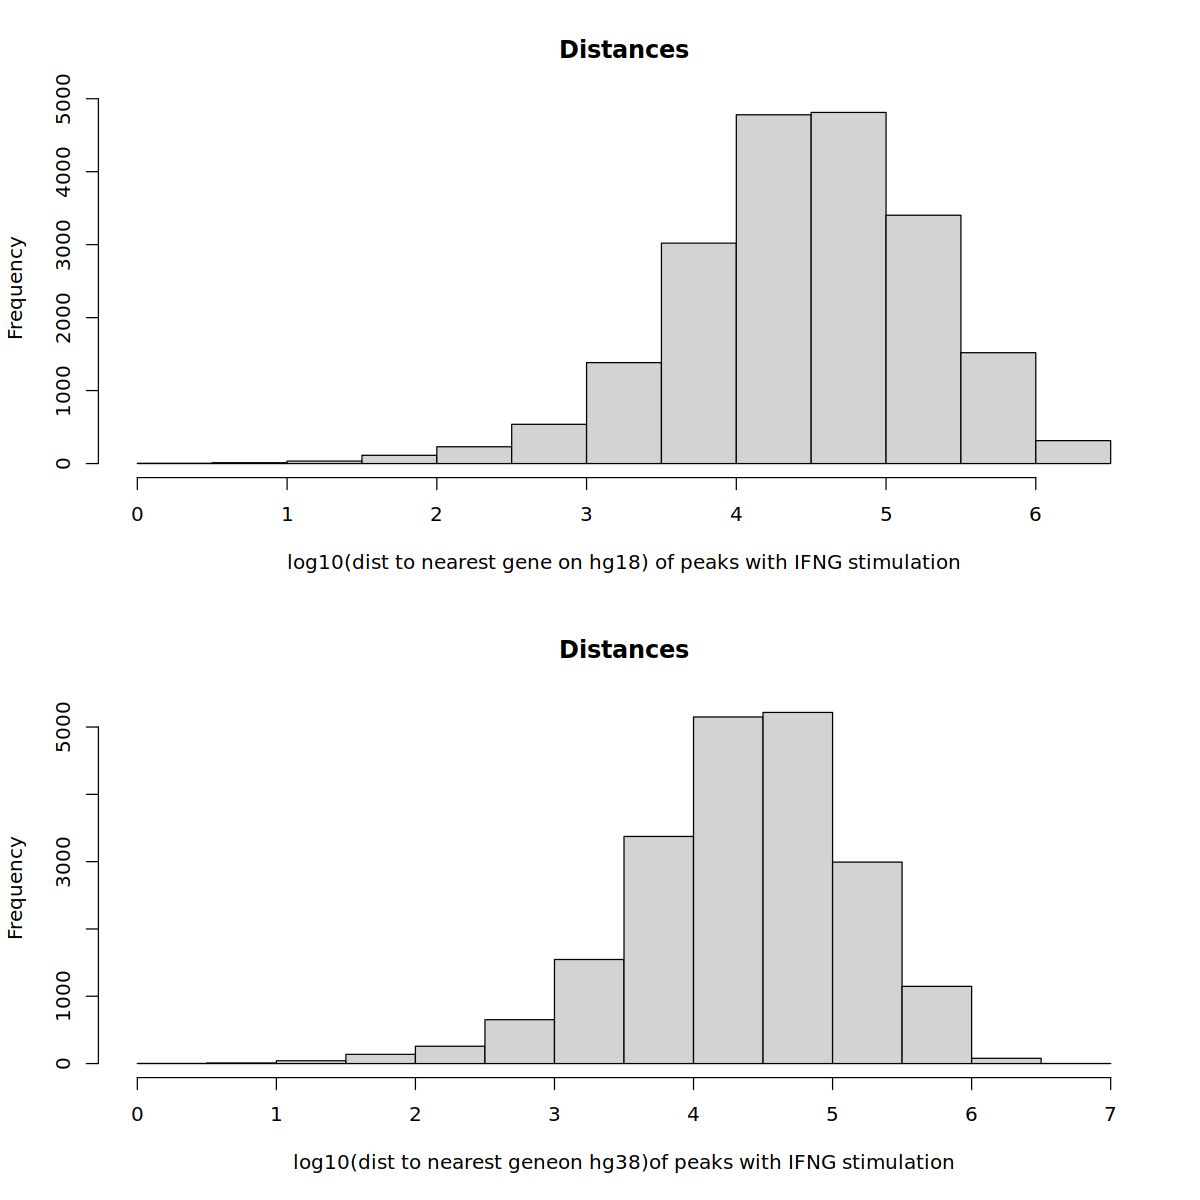

In [61]:
# Code cell n°58

par(mfrow = c(2,1))
dist2plot <- mcols(dists_ifng_hg18)[,1]
hist(log10(dist2plot),xlab = "log10(dist to nearest gene on hg18) of peaks with IFNG stimulation",
     main = "Distances")
dist2plot <- mcols(dists_ifng_hg38)[,1]
hist(log10(dist2plot),xlab = "log10(dist to nearest geneon hg38)of peaks with IFNG stimulation",
     main = "Distances")

<div class="alert alert-warning" role="alert"><b>Question</b><br>Do distances vary after liftOver or following stimulation?</div>

<span style="color:blue">How could you statistically compare these distributions? Enter your code in the next 3 cells n°59 to 61. </span>

- between hg18 and hg38 in unstimulated samples?

In [ ]:
# Code cell n°59



- between hg18 and hg38 in stimulated samples?

In [ ]:
# Code cell n°60



- following stimulation in hg38?

In [ ]:
# Code cell n°61



---
---

# Part 3. ChIP Seq on STAT1 and T1D gene expression
---

(estimated duration: 30 minutes)

## 3.A. Are DE genes between T1D and controls among the putative target genes of STAT1?
---

- We generate a dataframe with the distances computed above

In [ ]:
# Code cell n°62

dists_unstim_hg18_df <- as.data.frame(dists_unstim_hg18)
dists_ifng_hg18_df <- as.data.frame(dists_ifng_hg18)
head(dists_unstim_hg18_df)
head(dists_ifng_hg18_df)


dists_unstim_hg38_df <- as.data.frame(dists_unstim_hg38)
dists_ifng_hg38_df <- as.data.frame(dists_ifng_hg38)
head(dists_unstim_hg38_df)
head(dists_ifng_hg38_df)

- We now need to identify the peaks and the genes corresponding to the `queryHits` index and the `subjectHits` index. We do that with two consecutive merging.

For hg18 we need to add a column "index" since the row names do not match indexes.

In [ ]:
# Code cell n°63

ens.gene.ann.hg18$index <- 1:nrow(ens.gene.ann.hg18)

In [ ]:
# Code cell n°64

dists_unstim_hg18_df <- merge(dists_unstim_hg18_df, STAT1_unstim_peaks_hg18, by.x = "queryHits", by.y = 0, sort = F, all = T)
dists_unstim_hg18_df<- merge(dists_unstim_hg18_df, ens.gene.ann.hg18, by.x = "subjectHits", by.y = "index", all.x = T, all.y = F, sort = F)

In [ ]:
# Code cell n°65

dists_ifng_hg18_df <- merge(dists_ifng_hg18_df, STAT1_ifng_peaks_hg18, by.x = "queryHits", by.y = 0, sort = F, all = T)
dists_ifng_hg18_df<- merge(dists_ifng_hg18_df, ens.gene.ann.hg18, by.x = "subjectHits", by.y = "index", all.x = T, all.y = F, sort = F)

In [ ]:
# Code cell n°66

dists_unstim_hg38_df <- merge(dists_unstim_hg38_df, STAT1_unstim_peaks_hg38, by.x = "queryHits", by.y = 0, sort = F, all = T)
dists_unstim_hg38_df <- merge(dists_unstim_hg38_df, ens.gene.ann.hg38, by.x = "subjectHits", by.y = 0, all.x = T, all.y = F, sort = F)

In [ ]:
# Code cell n°67

dists_ifng_hg38_df <- merge(dists_ifng_hg38_df, STAT1_ifng_peaks_hg38, by.x = "queryHits", by.y = 0, sort = F, all = T)
dists_ifng_hg38_df <- merge(dists_ifng_hg38_df, ens.gene.ann.hg38, by.x = "subjectHits", by.y = 0, all.x = T, all.y = F, sort = F)

In [ ]:
# Code cell n°68

head(dists_unstim_hg18_df)

In [ ]:
# Code cell n°69

dists_unstim_hg18_df %<>% rename(chr.peak = chr, start.peak = start, end.peak = end,
                                 chr.gene = Chromosome, start.gene = Start, end.gene = End)

In [ ]:
# Code cell n°70

dists_ifng_hg18_df %<>% rename(chr.peak = chr, start.peak = start, end.peak = end,
                                 chr.gene = Chromosome, start.gene = Start, end.gene = End)

In [ ]:
# Code cell n°71

head(dists_unstim_hg38_df)

In [ ]:
# Code cell n°72

dists_unstim_hg38_df %<>% rename(chr.peak = chr.x, start.peak = start.x, end.peak = end.x,
                                 chr.gene = chr.y, start.gene = start.y, end.gene = end.y)

dists_ifng_hg38_df %<>% rename(chr.peak = chr.x, start.peak = start.x, end.peak = end.x,
                                 chr.gene = chr.y, start.gene = start.y, end.gene = end.y)

Thus we obtain two dataframes with the peak coordinates on the left and the putative target genes on the right.

- Now we create 4 variables in the DE dataframe indicating whether a gene is a putative target of STAT1 with or without stimulation. 

In [ ]:
# Code cell n°73

DE %<>% mutate(stat1_target_unstim_hg18 = TargetID %in% dists_unstim_hg18_df$Gene,
               stat1_target_ifng_hg18 = TargetID %in% dists_ifng_hg18_df$Gene,
               stat1_target_unstim_hg38 = TargetID %in% dists_unstim_hg38_df$SYMBOL,
               stat1_target_ifng_hg38 = TargetID %in% dists_ifng_hg38_df$SYMBOL)

- We can count how many genes are targeted or not by STAT1  depending on IFNG stimulation, for example on hg38.

In [ ]:
# Code cell n°74

table(DE$stat1_target_ifng_hg38, DE$stat1_target_unstim_hg38)

- We do the same in the subset of significantly DE genes at an adjusted pvalue of 0.05.

In [ ]:
# Code cell n°75

DE %>% filter(adj.P.Val < 0.05) %>% count(stat1_target_ifng_hg38, stat1_target_unstim_hg38)

You could go further by performing an overrepresentation test of DE genes among the set of genes that are putative targets for STAT1 (cf. session 1).

## 3.B. Do STAT1 putative target genes vary differently than non targeted genes?
---

- Here we do it with the fold change. You could ask similar questions with the average expression.

In [ ]:
# Code cell n°76

DE %>% group_by(stat1_target_unstim_hg38) %>% 
summarise(counts = n(),
          median = median(logFC),
          Q1 = quantile(logFC, probs=0.25),
          Q3 = quantile(logFC, probs=0.75),
          mean = mean(logFC),
          mean_ci_low = mean_ci(logFC)$ymin ,
          mean_ci_high = mean_ci(logFC)$ymax,
          std = sd(logFC))

In [ ]:
# Code cell n°77

DE %>% group_by(stat1_target_ifng_hg38) %>% 
summarise(counts = n(),
          median = median(logFC),
          Q1 = quantile(logFC, probs=0.25),
          Q3 = quantile(logFC, probs=0.75),
          mean = mean(logFC),
          mean_ci_low = mean_ci(logFC)$ymin ,
          mean_ci_high = mean_ci(logFC)$ymax,
          std = sd(logFC))

In [ ]:
# Code cell n°78

plot1 <- DE %>% filter(adj.P.Val < 0.05) %>% ggplot(aes(x = stat1_target_unstim_hg38, y = logFC, color = stat1_target_unstim_hg38)) +
  geom_violin() +
  geom_boxplot(width = 0.05, col = "black", outlier.shape = NA) +
  geom_jitter() +
  stat_compare_means(method = "t.test", label.x = 1.5, label.y = 2.5) +
  stat_compare_means( label.x = 1.5)

In [ ]:
# Code cell n°79

plot2 <- DE %>% filter(adj.P.Val < 0.05) %>% ggplot(aes(x = stat1_target_ifng_hg38, y = logFC, color = stat1_target_ifng_hg38)) +
  geom_violin() +
  geom_boxplot(width = 0.05, col = "black", outlier.shape = NA) +
  geom_jitter() +
  stat_compare_means(method = "t.test", label.x = 1.5, label.y = 2.5) +
  stat_compare_means( label.x = 1.5)

In [ ]:
# Code cell n°80

options(repr.plot.width = 20, repr.plot.height = 10)
ggarrange(plot1, plot2)

<span style="color:green">=> Explain in details the above commands in cells 78-80.</span>



## 3.C. Do STAT1 putative target genes show a higher expression in the T1D dataset when the ChIP-Seq peak height increases?

---

To answer that question, we will look at the correlation between peaks heights and average gene expression.

- This time we merge the FC, adjusted Pvalue and Average expression to the dataframe of distances between peaks and genes.

In [ ]:
# Code cell n°81

str(dists_unstim_hg18_df)

In [ ]:
# Code cell n°82

dists_unstim_hg18_df %<>%
 left_join(DE %>% dplyr::select(TargetID, logFC, AveExpr, adj.P.Val) , 
            by = c("Gene" = "TargetID"))

dists_ifng_hg18_df %<>%
 left_join(DE %>% dplyr::select(TargetID, logFC, AveExpr, adj.P.Val) , 
            by = c("Gene" = "TargetID"))

In [ ]:
# Code cell n°83

dists_unstim_hg18_df %>% filter(adj.P.Val < 0.05) %>% ggplot(aes(x = height, y = AveExpr)) + geom_point()


In [ ]:
# Code cell n°84

myplot <- ggscatter(dists_unstim_hg18_df  %>% filter(adj.P.Val < 0.005 & height < 50), x = "height", y = "AveExpr",  
          alpha=0.5,
          size=1,
          add = "reg.line",                                 
          conf.int = TRUE,
          add.params = list(color = "blue",
                            fill = "lightgray")
                   ) +
  stat_cor(method = "spearman") +
  ggtitle("Pearson correlation between ")

myplot +   geom_text_repel(aes(label = Gene), size = 3)

<div class="alert alert-block alert-success"><b>Success:</b> Well done! You now know how to draw correlograms, manipulate ChIPSeq data and annotation files and perform overlap analysis using genomic ranges!
</div>
    

<div class="alert alert-block alert-info"><b> What can you try by yoursef?</b><br>
Here are some ideas:<br>
- try to redo the analyses with other DGE outputs: above we used either the full model or one contrast only.<br>
- try other cutoffs for significant genes<br>
- try to look for STAT1 target enrichment with ORAs methods.<br>
- try to compare peaks before and after IFNG stimulation.<br>
- try other ChIPSeq data for other transcription factors, or other epigenomics data (HiC, TADs, CTCFs, H3K27ac...) in different cell types or contexts.<br>
- try to look for distances with TSS rather than just the nearest gene (whatever the orientation).<br>
- try to look at other DE threshold, or hg38, or stimulated data for the final correlation.<br>
- try to look at the target sequences of STAT1 peaks and identify consensus sequences.<br>
- try to see if co-regulated genes are located in common TADs, or could appear to be regulated by the same enhancer. <br>  
- try to see if you could separate target DE genes in those that are regulated by STAT1 on their promoter and those that are regulated by STAT1 via a distant enhancer, and the possible link with stimulation by IFNG. <br> 
    etc...
    
</div>

To further explore these questions, you can exploit these ressources:

**Epimap**, Epigenome Integration across Multiple Annotation Projects: http://compbio.mit.edu/epimap/   
**TADKB**, an integrated resource for exploring topologically associating domains (TADs): http://dna.cs.miami.edu/TADKB/   
**netZoo**, a catalog of gene regulatory network inference and analysis methods: https://netzoo.github.io/   
**GSDB**, a database of three-dimensional (3D) chromosome and genome structures reconstructed from Hi-C data: http://sysbio.rnet.missouri.edu/3dgenome/GSDB/index.php (obsolete link...)  



[version 12/12/2022 - last revision:@Scaburet]